# Titanic Survival Prediction Using Python by `Sujan Neupane`

## Downloading and loading the file

In [774]:
pip install opendatasets --quiet

In [775]:
# importing the fundamental libraries
import opendatasets as od
import numpy as np
import pandas as pd
import os

In [776]:
# link to kaggle dataset
url = 'https://www.kaggle.com/c/titanic/data'

In [777]:
# using opendatasets to download files directly from kaggle
od.download(url)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [778]:
os.listdir('titanic')

['gender_submission.csv', 'train.csv', 'test.csv']

In [779]:
# lets load the downloaded files into a pandas dataframe
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
submission_df = pd.read_csv('titanic/gender_submission.csv')

In [780]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [781]:
train_df.shape

(891, 12)

In [782]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [783]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [784]:
test_df.shape

(418, 11)

In [785]:
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Gathering Insights Into the Dataset

In [786]:
# the columns present in the training dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Here, the `Survived` column is the target column and the remaining columns are features.

In [787]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can clearly see that there are total of 891 entries in the train_df. However, some columns have missing values. Thus, we will later perfom steps to clean the data from the training dataframe: Like filling up the null values which is also called `Imputing`.

In [788]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can clearly see that there are 3 columns that have missing values: `Age`,`Cabin`,and `Embarked`. We need to determine whether these columns are categorical or numerical. If the column is categorical, we could simply replace the null values with randomly selecting a category according to the category's probability. If the column is numeric, we could fill the null values with different statistical methods like `mean`,`Median`,`Mode` and so on.

In [789]:
# Lets determine which columns are categorical 
categorical_cols = train_df.select_dtypes(include = 'object').columns.to_list()
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [790]:
# Lets determine which columns are numerical
numerical_cols = train_df.select_dtypes(include = 'number').columns.to_list() # we can also use include = np.number
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [791]:
# lets check our numerical columns from the train_df
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Conclusions we can draw from above:

1. The mean age is approximately 29, and std is 15. This tells us that the majority of age is distributed between (29-15) and (29+15).

2. In the survived column, we can see that it has mean value of 0.38. This indicates that if a random person on the titanic is selected, the probability of him/her surviving is approximately 38 % ,as calculated in the data in this dataset.

3. Thus, for a person, their chances of dying is approximately 62 % ,which is further proven in the cell below.

In [792]:
# Checking the testing dataset for null values
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We can also see that the testing data also has missing values. Therefore, we will also perform imputation on the testing dataset.

## Exploratory Data Analysis and Visualization

In [793]:
# importing the data visualization libraries 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

###  `Survived` column

In [794]:
# Lets see the probabilities of People who survived and did not survive
train_df.Survived.value_counts()/len(train_df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

We can clearly see that, out of all the recorded passengers in the dataset, only about 38 % survived, whereas almost 62 % did not. So, if a random passenger is selected from the titanic, the chances of the person surviving is less than 40 %. The persons survival also depends upon several other features which are explained in the cells below.

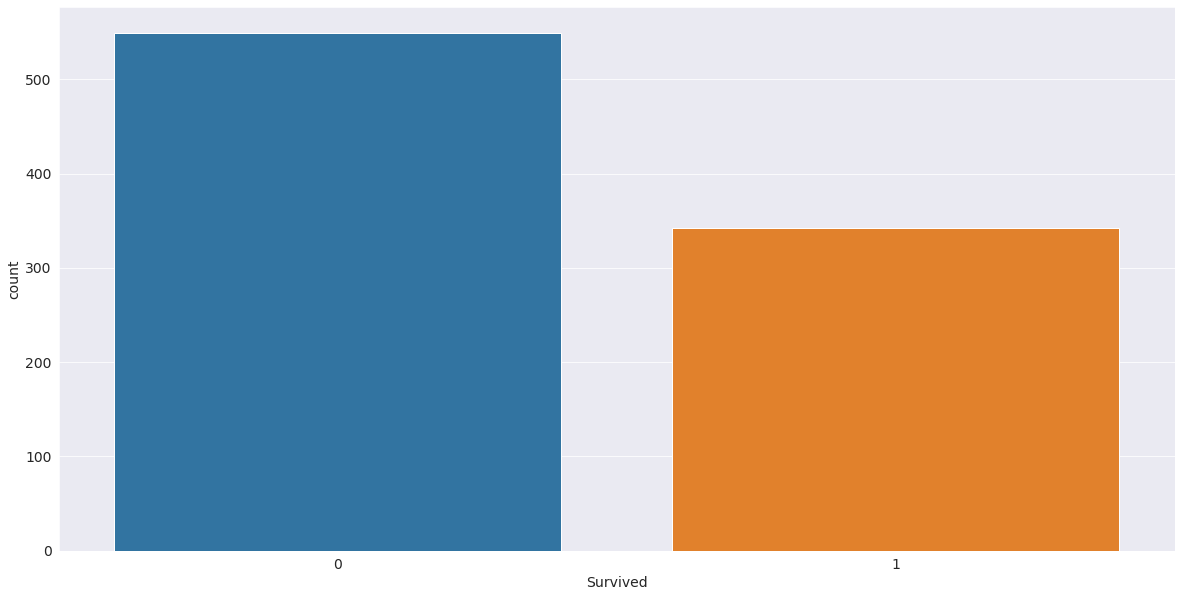

In [795]:
# plotting the Survived column as a countplot
sns.countplot(x = train_df.Survived);

Here, 0  refers to `Not Survived` and 1 refers to `Survived`.

###  `Sex` Column

In [796]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Through the cell above, we can make a conclusion that the male population in the titanic outnumbers female population by almost 1:75:1. 

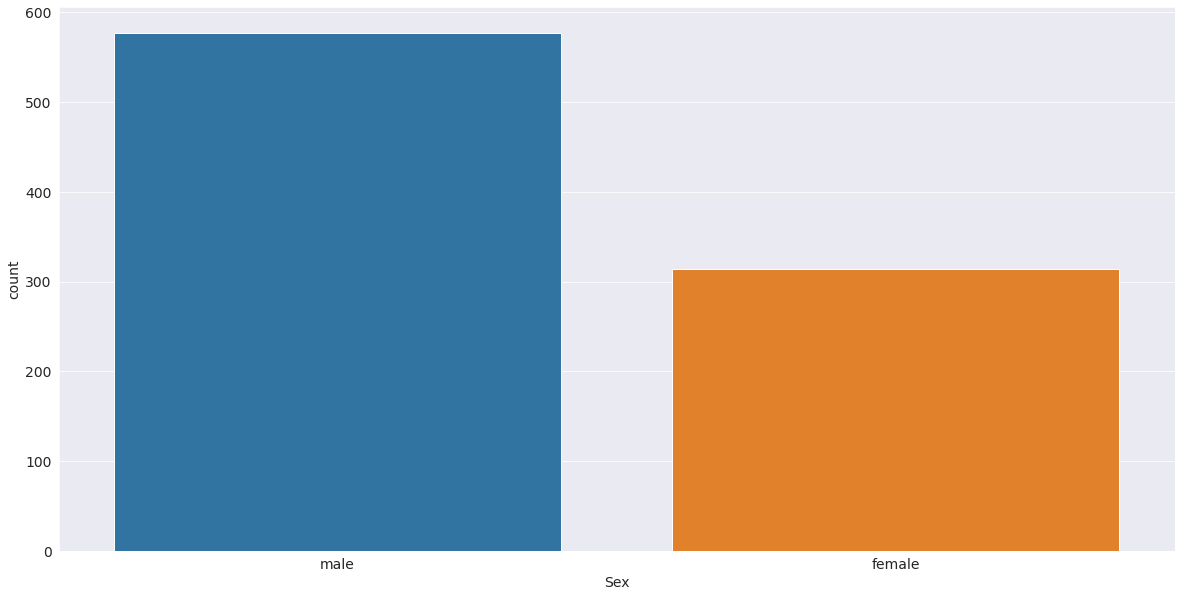

In [797]:
# plotting Sex column as a countplot
sns.countplot(x = train_df.Sex);

###  `Cabin` Column

In [798]:
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We can see that there are different cabins in the titanic. Therefore, the probability of a person surviving could be higher for a certain cabin, and low for a different cabin. 

###  `Pclass` Column

In [799]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

`Pclass` refers to passenger class. There are almost 500 passenegers belonging to `Pclass 3`. But, the number of passengers in the `Pclass 1 and 2` are 184 and 216. Thus, we can conclude that there are more poor or middle class people in the passenger class 3 as compared to passenger class 1 and 2. This can be interpreted such that a rich person has higher probabolity than a poor to survive as they will have more resources available. This can be concluded from the `Pclass` colum  n.

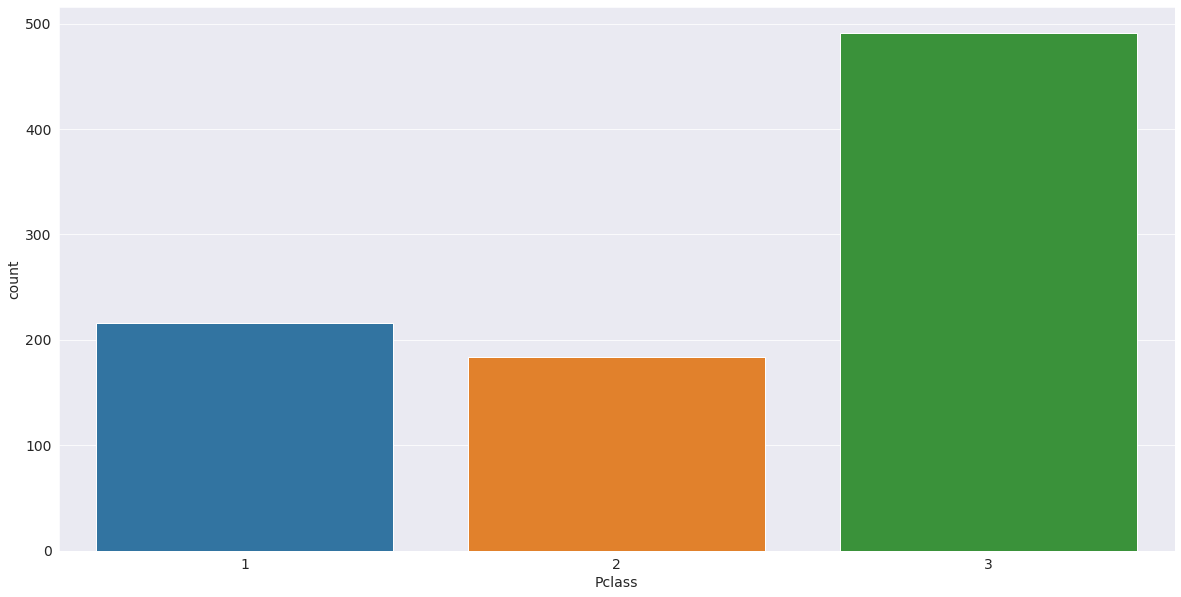

In [800]:
sns.countplot(x = 'Pclass', data = train_df);

### `Embarked` Column

In [801]:
# Embarked refers to Port of Embarkation
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked refers to Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton. A passengers probabolity of survival could depend on which port is the passenger departed from.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


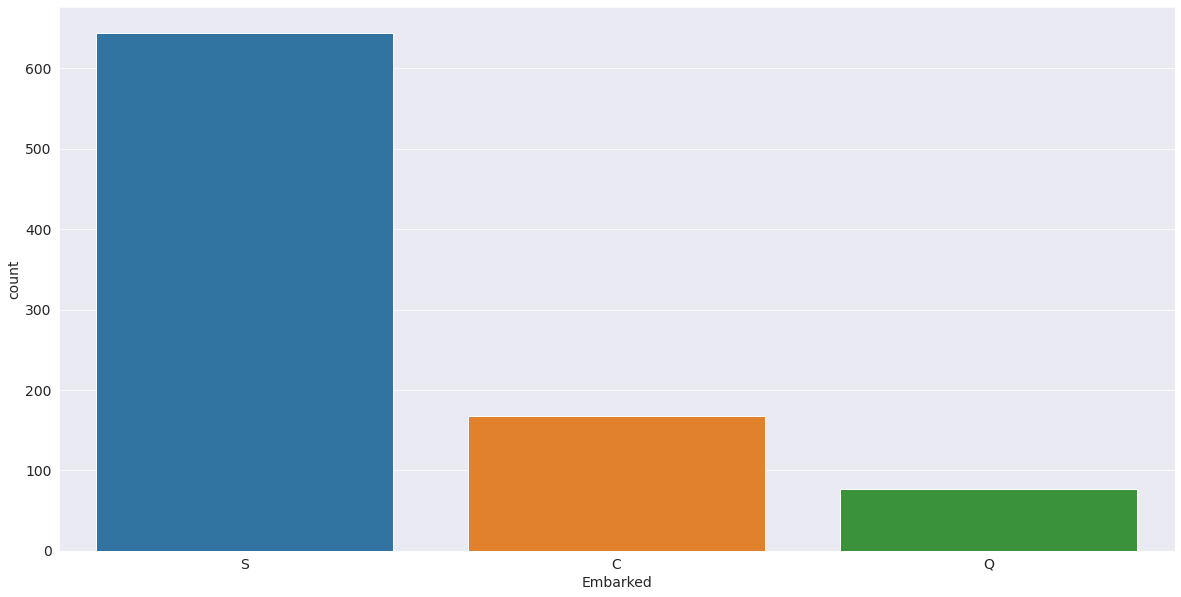

In [802]:
sns.countplot(train_df.Embarked);

### `Fare` Column

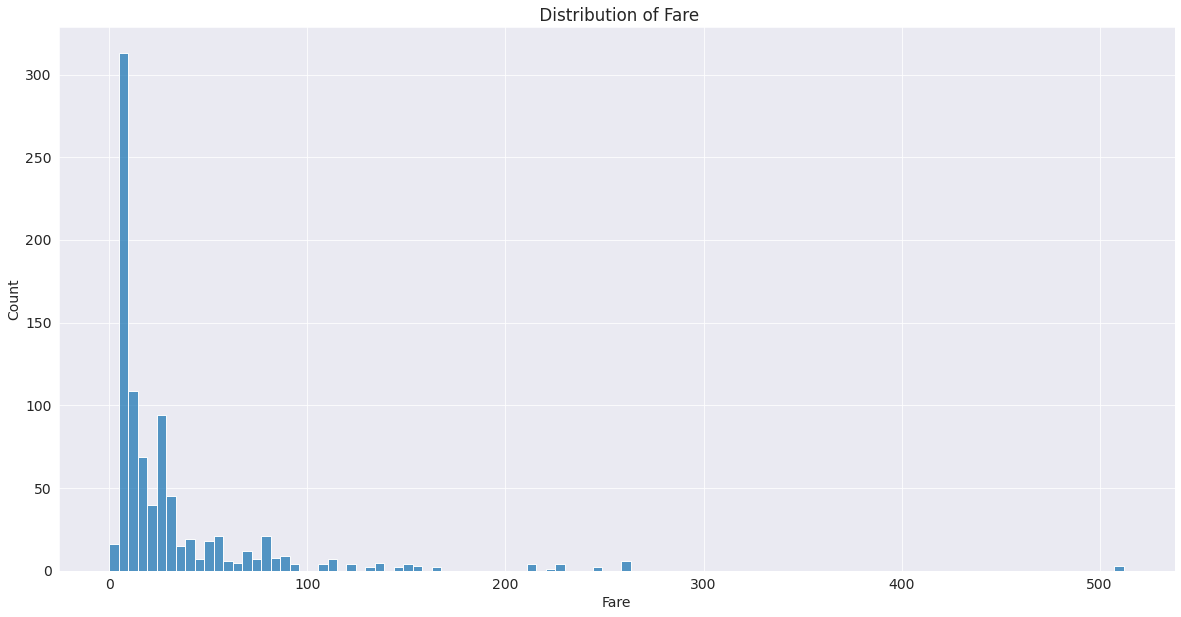

In [803]:
# distribution of Fare column
plt.title(' Distribution of Fare')
sns.histplot(x = train_df.Fare);

### `Parch` column

In [804]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Parch : Number of parents / children aboard the Titanic
Here, Parch refers to number of children the parents have boarded the titanic with. We can clearly see that almot 80 % of parents have no children they boarded with. Similarly, There is a parent who is boarded with 6 children.

The number of children being boarded could also affect the chances of that parents survival. More children around requires to provide more attention to the children.

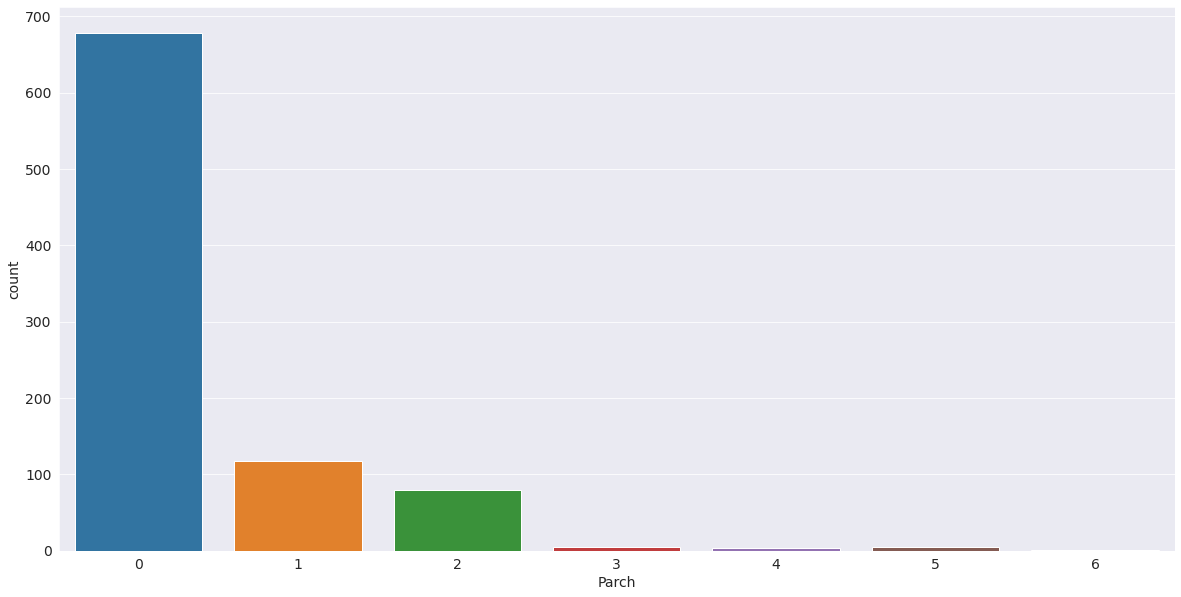

In [805]:
sns.countplot(x = train_df.Parch)

### `SibSp` Column

In [806]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

SibSp: Number of siblings / spouses aboard the Titanic

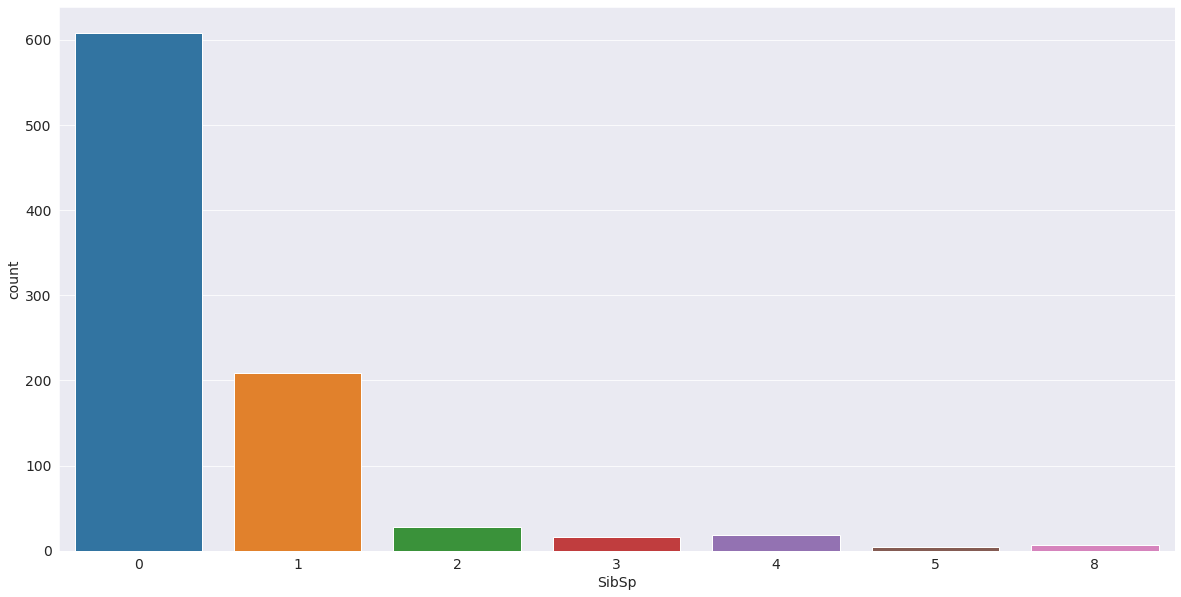

In [807]:
sns.countplot(x = train_df.SibSp);

### `Age` Column

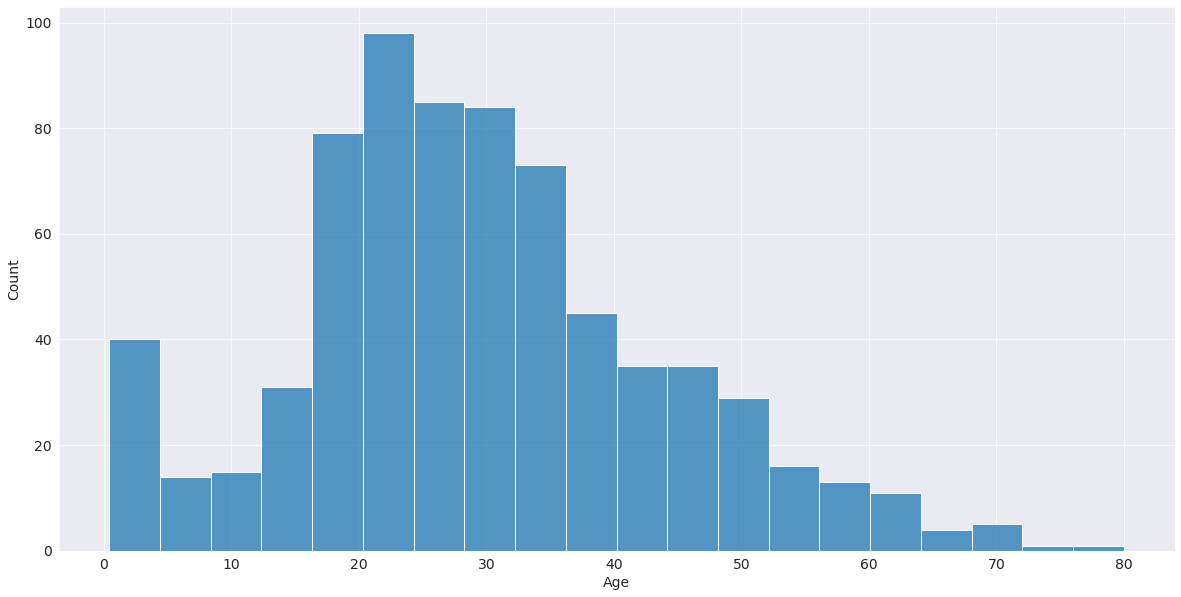

In [808]:
# distribution of Age column
sns.histplot(x = 'Age', data = train_df);

From the histogram above, we can clearly see that majority of age lie in the 15 to 40. We know that the mean for this column is about 29. In the histogram above, we can see that majority of age values lie very close to the mean, also concluding that this is a normal distribution.

### Age vs Survival

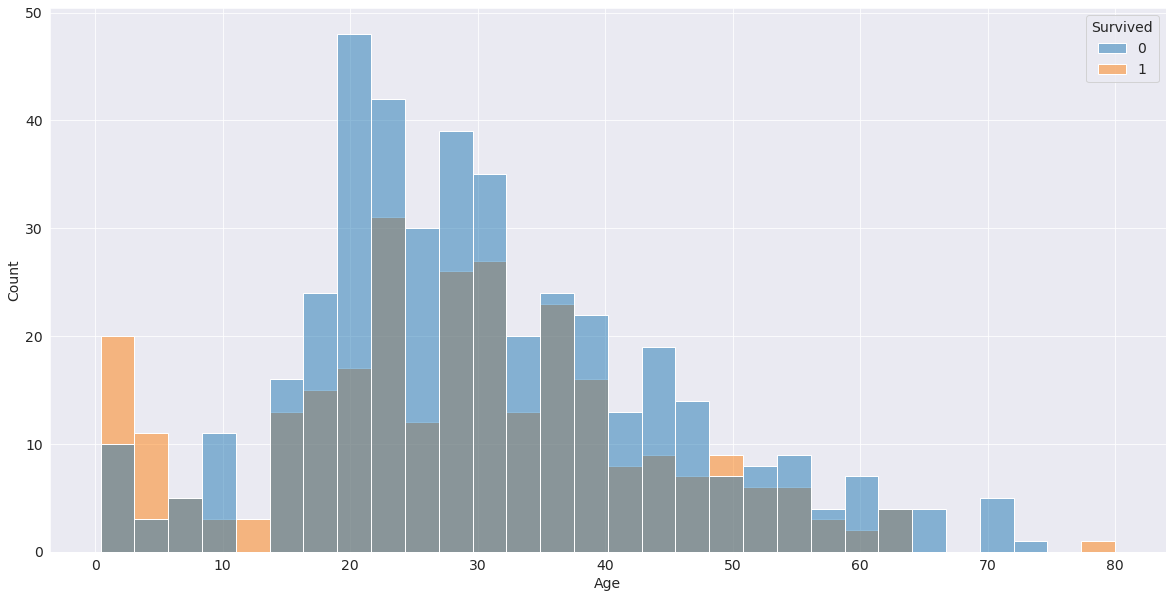

In [809]:
sns.histplot(x = 'Age', data = train_df, hue = 'Survived',bins = 30);

In [810]:
pd.pivot_table(data = train_df, index = 'Survived', values = ['Age'])

,Age
Survived,
0,30.626179
1,28.343690


From the table above, we can conclude that the average age of survivors is 28, meaning that younger people are likely to survive than older ones.

### Sex vs Survival

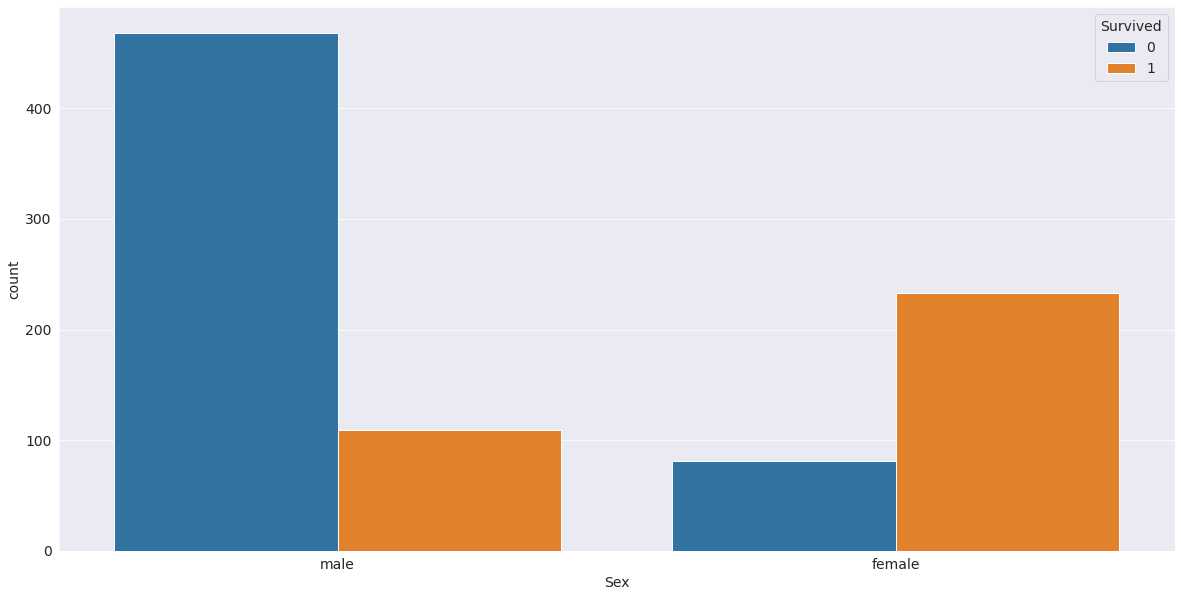

In [811]:
sns.countplot(data=train_df, x = 'Sex', hue = 'Survived');

In [812]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Pclass vs Survival

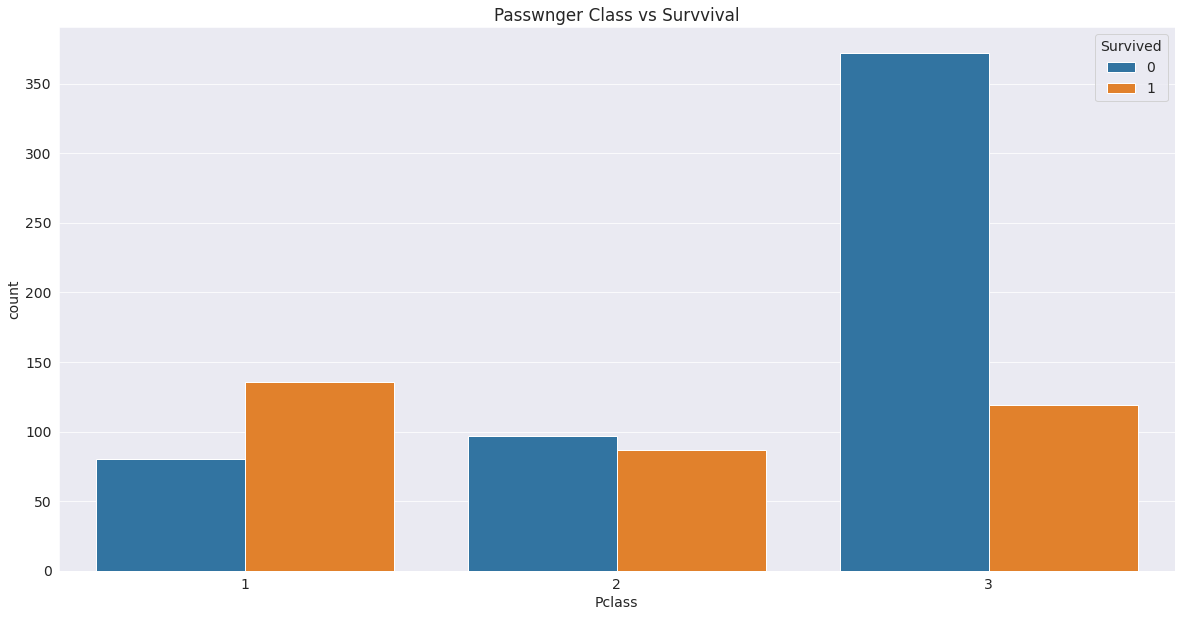

In [813]:
plt.title('Passwnger Class vs Survvival')
sns.countplot(x = train_df.Pclass, hue =train_df.Survived);

### Embarked vs Survival


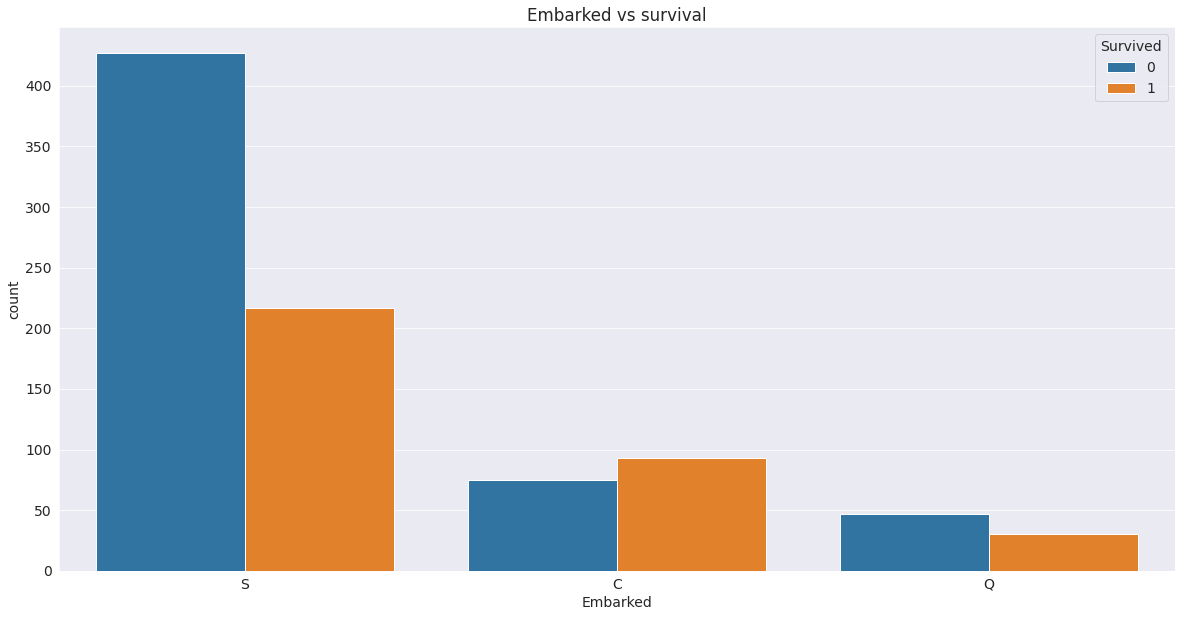

In [814]:
plt.title('Embarked vs survival')
sns.countplot(x = train_df.Embarked, hue = train_df.Survived);

## Preprocessing and Feature Engineering

Lets convert the categorical data into numeric form by using  encoding process.
 And we will also use column transformer to transform multiple columns using a Label Encoder directly.

<b> One Hot Encoder is different from Label Encoder </b>
In this case I will use Label Encoder

From these categorical columns, we will only be using `Sex`, `Cabin`, and `Embarked` columns only. So, we will only encode these columns.

Before performing label encoding, we need to clean the null values from the Sex, Cabin, and Embarked columns.

### Imputing Null Values From Categorical Columns

<b> Imputing Embarked Column </b>

In [815]:
train_df.Embarked.isnull().sum()

2

In [816]:
# Since the label S has appeared the most, it is perhaps the best to replace the 
train_df.Embarked.fillna('S', inplace = True)

In [817]:
train_df.Embarked.isnull().sum()

0

In [818]:
# converting the dtype of Embarked column into string
train_df.Embarked = train_df.Embarked.astype('string')

<b> Imputing Cabin column</b>

In [819]:
cabins = list(dict(train_df.Cabin.value_counts()).keys())
cabin_values = list(dict(train_df.Cabin.value_counts()).values())

In [820]:
# total null values present in the Cabin column
train_df.Cabin.isnull().sum()

687

In [821]:
# total size of cabin column
train_df.Cabin.size

891

<b> Imputing Sex column </b>

In [822]:
train_df.Sex.isnull().sum()

0

We can clearly see that out of total of 891 data in the Cabin column, 687 of them are null values. which is more than 75 % of the actual data. So, it does not make any sense to impute these null values because, by adding random values into almost 75 % of the data will not be so good data to feed into the model.

So, lets simply leave this column as it is.

### Encoding the selected categorical columns

In [823]:
# Lets import LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [824]:
# Lets transform embarked into numercial values
train_df.Embarked = labelencoder.fit_transform(train_df.Embarked)

In [825]:
# encoding the sex column
train_df.Sex = labelencoder.fit_transform(train_df.Sex)

Alternatives:
1. using OneHotEncoder
2. Using make_column_transformer
3. train_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

4. train_df['sex'] = df.sex.map({'male':1,'female':0})

5. train_df['sex'].replace(to_replace = dict(male=1,female=0),inplace=True)

### Imputing Numerical Columns

In [826]:
train_df[numerical_cols].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

We could use simple imputer to impute the null values in `Age` column. So, lets fill the null values with simple imputer's strategy set to mean.

In [827]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

imputer.fit(train_df[['Age']])
list(imputer.statistics_), train_df.Age.mean()
train_df['Age'] = imputer.transform(train_df[['Age']])

Alternatives:
1. train_df.Age.fillna(train_df.Age.mean(),inplace = True)

2. train_df.Age.replace(to_replace = np.nan, value = train_df.Age.mean())

3.  for i in df:

      average_age = df.age.mean()

      average_std = df.age.std()
      
      age_null_count = (df.age.isnull().sum())
      
      random_list = np.random.randint(average_age - average_std, average_age + average_std)

      df['age'].replace(to_replace = np.nan, value = random_list,inplace = True)

In [828]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [829]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Cleanng the Testing Data using Inputation

<b> Imputing Age column with strategy set to mean </b>

In [830]:
imputer.fit(test_df[['Age']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [831]:
list(imputer.statistics_), test_df.Age.mean()

([30.272590361445783], 30.272590361445783)

In [832]:
test_df.Age = imputer.transform(test_df[['Age']])

<b> Imputing the Fare column with strategy set to median </b>

In [833]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(test_df[['Fare']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [834]:
list(imputer.statistics_), test_df.Fare.median()

([14.4542], 14.4542)

In [835]:
test_df.Fare = imputer.transform(test_df[['Fare']])

In [836]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Relation between multiple columns

In [837]:
coo = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
train_df[coo]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [838]:
# Generating a pivot table
pd.pivot_table(index = 'Survived', values = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'], data = train_df)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
Survived,,,,,,,
0,30.415100,1.641166,22.117887,0.329690,2.531876,0.852459,0.553734
1,28.549778,1.368421,48.395408,0.464912,1.950292,0.318713,0.473684



From the above pivot table's  columns, we can draw the following conclusions:


    1. The average age of survivors is approximately 28 ,meaning that younger people are likely to survive.
    
    2. The people who paid higher fare are likely to survive more than the ones who paid less.
    
    3. The customers with their parents/ Children present are likely to have survied.
    
    4. If a passenger is a child with siblings, the chances of survival is clearly lower than the respected counterpart.

  

In [839]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


Here's how correlation coefficients can be interpreted:

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

## Preparing Training and Validation Set

In [840]:
# these columns are being selected for training the model
train_df.drop_duplicates(inplace =True)
train_df.drop(columns = ['PassengerId','Name','Ticket','Cabin'], axis = 1,inplace =True)

In [841]:
# Feature matrix
X = train_df.drop('Survived',axis =1)

# Response vector
y = train_df.Survived

In [842]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [843]:
X_train.shape, y_train.shape

((668, 7), (668,))

In [844]:
X_val.shape, y_val.shape

((223, 7), (223,))

## Training Our  Models

This is a classification problem. Thus, we will be making predictions using following models:

1. KNN

2. Logistic Regression

3. Descision Tree

4. Random Forest

5. Support Vector Machines

6. Naive Bayes

7. Gradient Boosting Machines

The above models will be used to make predictions. The models will also undergo hyperparameter tuning to boost accuracy as well. Each models best predictions will also be recorded. Confusion matrix will also be created for each model.

### <b> KNN model </b>

#### Training the KNN model

In [845]:
# importing the KNN model
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors = 5,weights = 'uniform',leaf_size = 30)  # Instantiating the default KNeighborsClassifier class

In [846]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [847]:
# Making predictions on the training data
train_pred = Knn.predict(X_train)

In [848]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,train_pred)

0.7919161676646707

We can clearly see that our model has calculated the training accuracy of about 79 %, which isn't very good at all.

In [849]:
# making predictions on the validation set and measuring accuracy
accuracy_score(y_val,Knn.predict(X_val))

0.7130044843049327

The validation accuracy is calculated to be just 71.3 % ,which is not good whatsoever. But, we can also make a conclusion that our model has not overfitted with the training data: Our model has not memorized the process on the training data.

However, we have calculated the validation accuracy to be 71 %.

In [850]:
y_val.value_counts()/y_val.size*100

0    60.089686
1    39.910314
Name: Survived, dtype: float64

From the above cell, a random dumb model,if set to make a random prediction, will make a prediction such that 60% of the times it will predict that a passenger wont survive and 39 % times the passenger will survive. 

Our trained model had accuracy of just 71 %, which is just shy more than a random dumb model with accuracy 60 %. Thus, our model is worthless and it needs to undergo optimization by tuning its hyperparameters. 

We will mainly tune the following hypperparameters for our `KNN` model:
 1. n_neighbors
 2. weights
 3. leaf_size

#### Hyperparameter Tuning for KNN model

<b> Tuning the n_neighbors hyperparameter

In [851]:
%%time 

# by default n_neighbors or k == 5
training_scores = []
validation_scores = []
for i in range(1,30):
  Knn = KNeighborsClassifier(n_jobs = -1, weights = 'uniform', leaf_size = 30, n_neighbors = i)
  Knn.fit(X_train,y_train)
  training_scores.append(accuracy_score(y_train,Knn.predict(X_train)))
  validation_scores.append(accuracy_score(y_val,Knn.predict(X_val)))

CPU times: user 1.36 s, sys: 86.7 ms, total: 1.45 s
Wall time: 6.9 s


In [852]:
print('When n_neighbors = '+str(training_scores.index(max(training_scores))+1)+" ,the maximum training accuracy = "+str(max(training_scores)))

When n_neighbors = 1 ,the maximum training accuracy = 0.9670658682634731


In [853]:
print('When n_neighbors = '+str(validation_scores.index(max(validation_scores))+1)+" ,the maximum validation accuracy = "+str(max(validation_scores)))

When n_neighbors = 19 ,the maximum validation accuracy = 0.7309417040358744


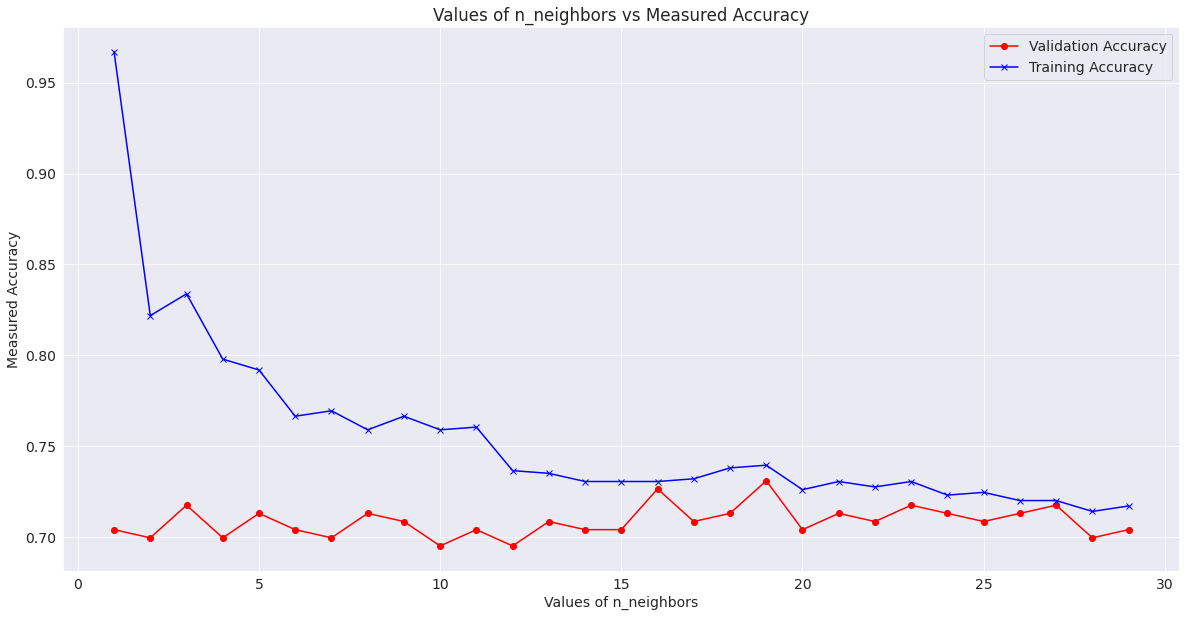

In [854]:
# Plotting in graph: Values of n_neighbors vs validation accuracy
plt.plot(range(1,30),validation_scores, color = 'red', marker = 'o')
plt.plot(range(1,30), training_scores, color = 'blue', marker = 'x')
plt.xlabel('Values of n_neighbors')
plt.ylabel('Measured Accuracy')
plt.title('Values of n_neighbors vs Measured Accuracy')
plt.legend(['Validation Accuracy','Training Accuracy']);

A model's performance is best calculated when it's efficiency is measured in the validation set. We can clearly see that, when n_neighbors = 1, our model has training accuracy of almost 98 % ,whereas validation accuracy is only about 71 %. This clearly means that ,for such tuning, our model has `overfitted` with the training data. Therefore, we will choose the best tuning for a condition when our validation accuracy is maximum. 

Thus, our best value of K is 19.

<b> Tuning the weights Hyperparameter </b>

By default, our weights parameter is set to uniform. We will tune it to distance.

In [855]:
# default model
Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 19, weights = 'uniform', leaf_size = 30)
Knn.fit(X_train,y_train)
print("Training Accuracy: ",accuracy_score(y_train,Knn.predict(X_train)))
print("Validation Accuracy: ",accuracy_score(y_val,Knn.predict(X_val)))

Training Accuracy:  0.7395209580838323
Validation Accuracy:  0.7309417040358744


In [856]:
# Tuning the weights parameter
# default model
Knn1 = KNeighborsClassifier(n_jobs = -1, n_neighbors = 19, weights = 'distance', leaf_size = 30)
Knn1.fit(X_train,y_train)
print("Training Accuracy: ",accuracy_score(y_train,Knn1.predict(X_train)))
print("Validation Accuracy: ",accuracy_score(y_val,Knn1.predict(X_val)))

Training Accuracy:  0.9820359281437125
Validation Accuracy:  0.7130044843049327


In [857]:
dict1 = {'Models':['Tuned Validation Accuracy','Tuned Training Accuracy','Untuned Validation Accuracy','Untuned Training Accuracy'],'Accuracy':[accuracy_score(y_val,Knn1.predict(X_val)),accuracy_score(y_train,Knn1.predict(X_train)),accuracy_score(y_val,Knn.predict(X_val)),accuracy_score(y_train,Knn.predict(X_train))]}

In [858]:
tuned_df = pd.DataFrame(dict1) #.reset_index()
tuned_df

,Models,Accuracy
0,Tuned Validation Accuracy,0.713004
1,Tuned Training Accuracy,0.982036
2,Untuned Validation Accuracy,0.730942
3,Untuned Training Accuracy,0.739521


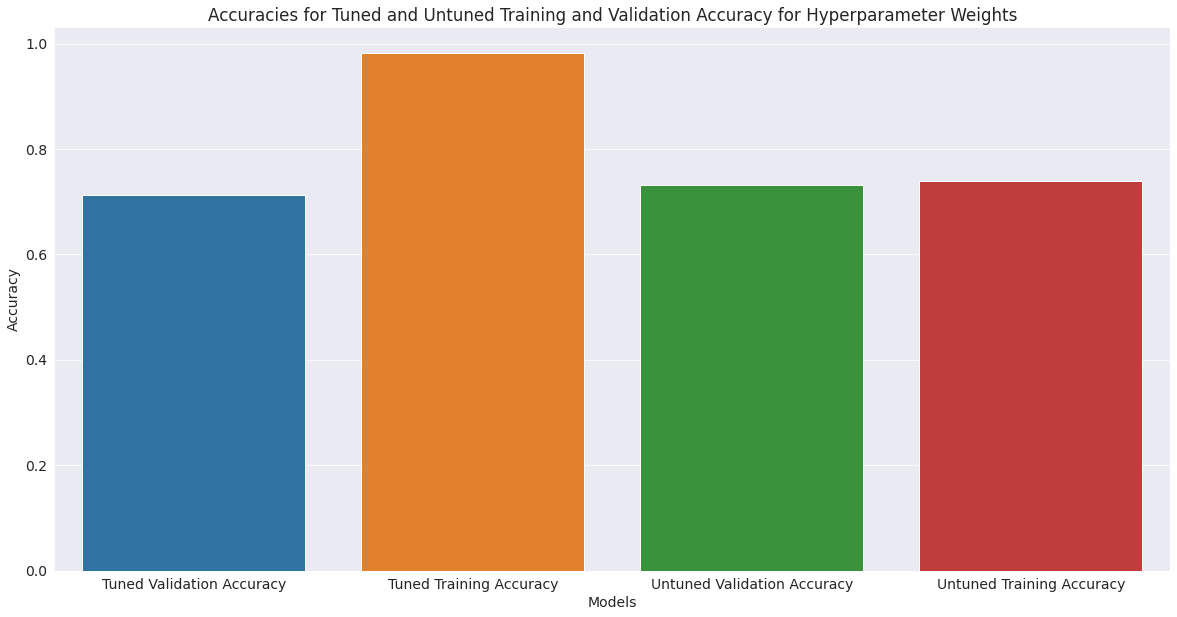

In [859]:
sns.barplot(x = 'Models', y ='Accuracy', data = tuned_df).set(title = 'Accuracies for Tuned and Untuned Training and Validation Accuracy for Hyperparameter Weights');
#plt.title("Accuracies for Tuned and Untuned Training and Validation Accuracy for Hyperparameter Weights");

We can clearly see that our model has overfitted with training data ,and validation accuracy is lower when weights is set to distance. So, it is best to set weights hyperparameter to uniform.

<b> Tuning leaf_size Hyperparameter </b>

In [860]:
leaf_size_values = [5,10] + list(range(25,325,25))

training_scores = []
validation_scores = []

for i in leaf_size_values:
  Knn = KNeighborsClassifier(n_jobs = -1, weights = 'uniform', n_neighbors = 19, leaf_size = i)
  Knn.fit(X_train,y_train)
  training_scores.append(accuracy_score(y_train,Knn.predict(X_train)))
  validation_scores.append(accuracy_score(y_val,Knn.predict(X_val)))

In [861]:
print("The Maximum Training accuracy = "+str(max(training_scores))+" ,when leaf_size = "+str(leaf_size_values[training_scores.index(max(training_scores))+1]))

The Maximum Training accuracy = 0.7395209580838323 ,when leaf_size = 50


In [862]:
print("The Maximum Validation accuracy = "+str(max(validation_scores))+" ,when leaf_size = "+str(leaf_size_values[validation_scores.index(max(validation_scores))+1]))

The Maximum Validation accuracy = 0.7309417040358744 ,when leaf_size = 50


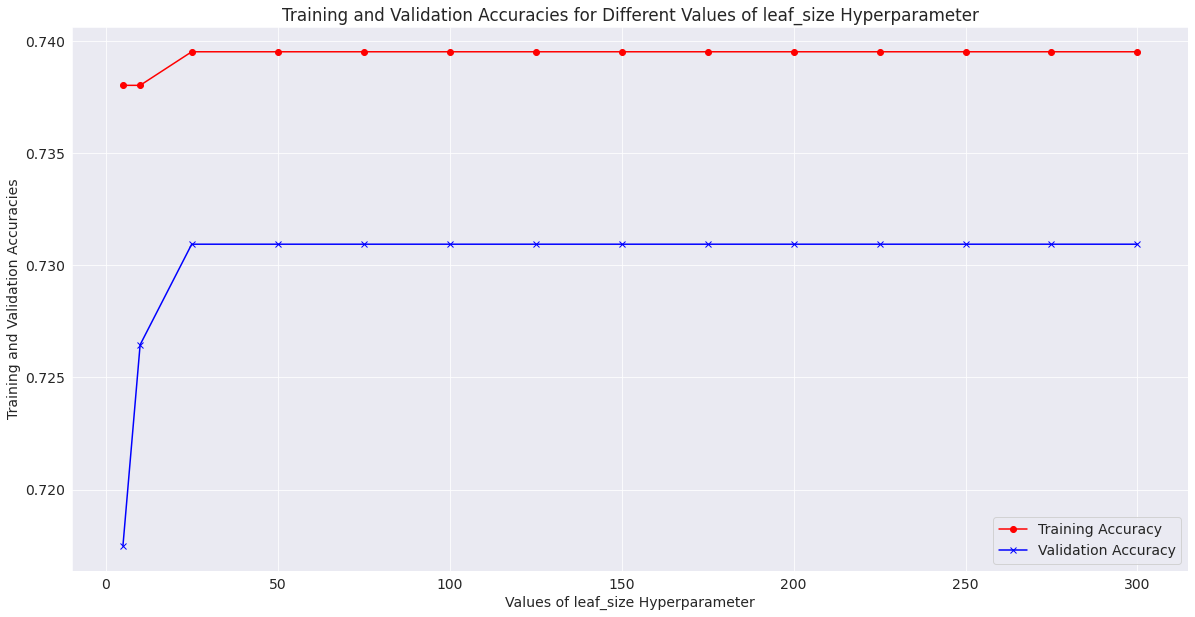

In [863]:
# Plotting training and validaiton accuracies for different values of leaf_size
plt.title("Training and Validation Accuracies for Different Values of leaf_size Hyperparameter")
plt.xlabel('Values of leaf_size Hyperparameter')
plt.ylabel('Training and Validation Accuracies')
plt.plot(leaf_size_values,training_scores, color = 'red', marker = 'o')
plt.plot(leaf_size_values,validation_scores, color = 'blue', marker = 'x')
plt.legend(['Training Accuracy','Validation Accuracy']);

Thus, we can conclude that our model performs best when leaf_size = 50. This tuning also prevents our model from overfitting on the training data.

#### Using K-fold cross validation

In [864]:
# our optimized model
Knn = KNeighborsClassifier(n_jobs = -1, weights = 'uniform', leaf_size = 50, n_neighbors = 19)

In [865]:
from sklearn.model_selection import cross_val_score
cv_train = cross_val_score(Knn,X_train,y_train,cv = 20, scoring = 'accuracy')
cv_validation = cross_val_score(Knn,X_val,y_val,cv = 20, scoring = 'accuracy')

In [866]:
print('Our mean cross validated accuracy on Training data = ',cv_train.mean())

Our mean cross validated accuracy on Training data =  0.707620320855615


In [867]:
print('Our mean cross validated accuracy on Validation data = ',cv_validation.mean())

Our mean cross validated accuracy on Validation data =  0.7106060606060606


This is our final tuned Knn model ,which we will now use on the testing data.

#### Confusion Matrix for KNN model

In [868]:
# our optimized model
Knn = KNeighborsClassifier(n_jobs = -1, weights = 'uniform', leaf_size = 50, n_neighbors = 19)
Knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform')

In [869]:
from sklearn.metrics import confusion_matrix

# preparing the confusion matrix for validation set
cm = confusion_matrix(y_val, Knn.predict(X_val))

In [870]:
cm

array([[116,  18],
       [ 42,  47]])

In [871]:
True_Positive = TP = cm[1,1]
True_Negative = TN = cm[0,0]
False_Positive = FP = cm[0,1]
False_Negative = FN = cm[1,0]

In [872]:
True_Positive,True_Negative,False_Positive,False_Negative

(47, 116, 18, 42)

<b> Classification Error </b>

How often is the classifier incorrect?

In [873]:
print((FP+FN)/ float(TP+TN+FP+FN))
print(1 - (accuracy_score(y_val,Knn.predict(X_val))))

0.26905829596412556
0.26905829596412556


<b> Sensitivity </b>

When the actual value is positive(1), how often is prediction correct ?

In [874]:
from sklearn import metrics

print(TP /float(TP+FN))
print(metrics.recall_score(y_val,Knn.predict(X_val), pos_label=1))

0.5280898876404494
0.5280898876404494


<b> Specificity </b>

When the actual value is negative, how often is the prediction correct ?

In [875]:
print(TN/float(TN + FP))

0.8656716417910447


<b> False Positive Rate </b>

When actual value is negative, how often is the prediction negative ?

In [876]:
print(FP/float(TN+FP)) # note: False positive rate = (1 - specificity)

0.13432835820895522


<b> Prediction</b>

When a positive value is predicted, how often is prediction correct ?

In [877]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_val,Knn.predict(X_val),pos_label=1))

0.7230769230769231
0.7230769230769231


#### Making Prediction on Testing data

In [878]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [879]:
# these columns are being selected for testing the model
test_df.drop_duplicates(inplace =True)
test_df.drop(columns = ['PassengerId','Name','Ticket','Cabin'], axis = 1,inplace =True)

<b> Encoding Categorical Columns for testing data </b>

In [880]:
test_df.Embarked = labelencoder.fit_transform(test_df.Embarked)

In [881]:
test_df.Sex = labelencoder.fit_transform(test_df.Sex)

In [882]:
test_predictions = Knn.predict(test_df)

In [883]:
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [884]:
# Measuring accuracy for testing data
testing_accuracy = accuracy_score(submission_df.Survived, test_predictions)
testing_accuracy

0.6818181818181818

Our testing accuracy is calculated to be only 68.2 % ,which is not good at all.

#### Saving the final prediction for Submission on Kaggle

In [885]:
# lets create a csv file and save our prediction for this model to be uploaded in kaggle
solution_df = submission_df.copy()
solution_df.Survived = test_predictions

In [886]:
# saving out predictions to a new file called 'submission_knn.csv'
solution_df.to_csv('submission_knn.csv', index = False)

### <b> Logistic Regression Model</b>

#### Training the Logistic Regression Model

In [887]:
# To train our logistic regression model, lets import logistic regression class from sklearn library
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(n_jobs = -1)

In [888]:
%%time

# Lets train our logistic regression model using fit() method
log_reg.fit(X_train,y_train)

CPU times: user 6.85 ms, sys: 0 ns, total: 6.85 ms
Wall time: 43.6 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [889]:
# calculating the coefficients
log_reg.coef_

array([[-0.92082512, -2.55765683, -0.03317316, -0.26679158, -0.124756  ,
         0.00345538, -0.23132825]])

The coefficients calculated are the different weights applied by corresponsing columns while making predictions.

In [890]:
# calculating the intercept
log_reg.intercept_

array([4.60517013])

In [891]:
# making predictions on training set using logistic regression model, and measuring accuracy
accuracy_score(y_train, log_reg.predict(X_train))

0.8023952095808383

In [892]:
# making predictions on validation set using logistic regression model, and measuring accuracy
accuracy_score(y_val, log_reg.predict(X_val))

0.8071748878923767

We can clearly see that our model has performed significantly better than our best tuned Knn model. Furthermore, the different between training and validation accuracy is also very low, indicating that our model has not overfitted with training data.

In [893]:
train_df.Survived.value_counts()/len(train_df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

From the above cell, a random dumb model,if set to make a random prediction, will make a prediction such that 60% of the times it will predict that a passenger wont survive and 39 % times the passenger will survive. 

Our trained model had accuracy of about 80 %, which is quite better than a random dumb model with accuracy 60 %. Thus, our model is better but it could perform even better after it undergoes optimization by tuning its hyperparameters. 

We will mainly tune the following hypperparameters for our `Logistic Regression` model:
 1. max_iter
 2. C
 3. fit_intercept

#### Hyperparameter Tuning for Logistic Regression Model

In [894]:
# our logistic regression model with default hyperparameters
log_reg = LogisticRegression(n_jobs = -1, random_state = 42, max_iter = 100, solver = 'lbfgs', C = 1.0, fit_intercept = True)

<b> Tuning our max_iter Hyperparameter </b>

By default, max_iter hyperparameter is set to 100.

In [895]:
max_iter_values = list(range(50,500,50))

training_scores = []
validation_scores = []

for i in max_iter_values:
  log_reg = LogisticRegression(n_jobs = -1, random_state = 42, solver = 'lbfgs', C = 1.0, fit_intercept = True, max_iter = i)
  log_reg.fit(X_train, y_train)
  training_scores.append(accuracy_score(y_train,log_reg.predict(X_train)))
  validation_scores.append(accuracy_score(y_val, log_reg.predict(X_val)))

In [896]:
print("The maximum Training accuracy = "+str(max(training_scores))+" ,when max_iter = "+str(max_iter_values[training_scores.index(max(training_scores))+1]))

The maximum Training accuracy = 0.8023952095808383 ,when max_iter = 150


In [897]:
print("The maximum Validation accuracy = "+str(max(validation_scores))+" ,when max_iter = "+str(max_iter_values[validation_scores.index(max(validation_scores))+1]))

The maximum Validation accuracy = 0.8071748878923767 ,when max_iter = 100


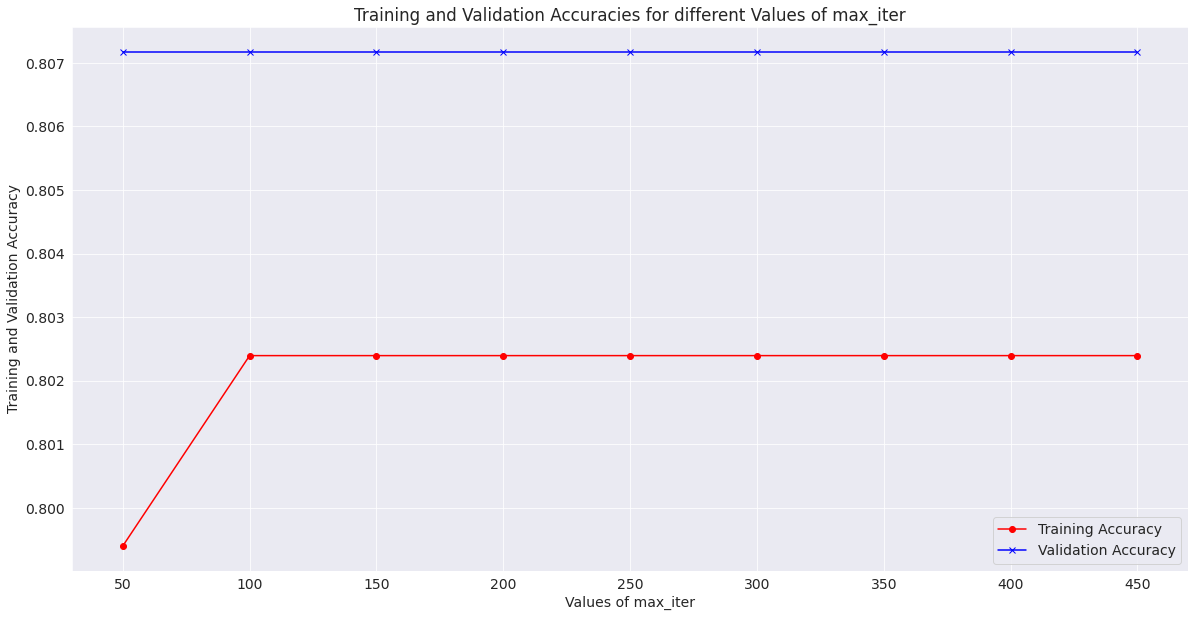

In [898]:
# plotting Training and Validation Accuracies for different Values of max_iter
plt.title('Training and Validation Accuracies for different Values of max_iter')
plt.xlabel('Values of max_iter')
plt.ylabel('Training and Validation Accuracy')
plt.plot(max_iter_values, training_scores, color = 'red', marker = 'o')
plt.plot(max_iter_values, validation_scores, color = 'blue', marker = 'x')
plt.legend(['Training Accuracy','Validation Accuracy']);

The validation accuracy does not seem to be affected much by max_iter ,whereas our training accuracy is constant after max_iter = 100. We also calculated that our validation accuracy is maximum when max_iter = 100. So, we will tune it that way.

In [899]:
# max_iter tuned model
log_reg = LogisticRegression(n_jobs = -1, random_state = 42, max_iter = 150,solver = 'lbfgs', C = 1.0, fit_intercept = True)

<b> Tuning the Hyperparameter C </b>

By default, C is set to 1.0

In [900]:
C_values = [100, 10, 1.0, 0.1, 0.01, 300,500]

training_scores = []
validation_scores = []

for i in C_values:
  log_reg = LogisticRegression(random_state = 42, C = i, fit_intercept = True, max_iter = 150)
  log_reg.fit(X_train, y_train)
  training_scores.append(accuracy_score(y_train,log_reg.predict(X_train)))
  validation_scores.append(accuracy_score(y_val, log_reg.predict(X_val)))

In [901]:
print("The maximum Training accuracy = "+str(max(training_scores))+" ,when C = "+str(C_values[training_scores.index(max(training_scores))+1]))

The maximum Training accuracy = 0.8083832335329342 ,when C = 0.01


In [902]:
print("The maximum Validation accuracy = "+str(max(validation_scores))+" ,when C = "+str(C_values[validation_scores.index(max(validation_scores))+1]))

The maximum Validation accuracy = 0.8161434977578476 ,when C = 0.01


In [903]:
dict1 = {'C Values':C_values,'Training Accuracies':training_scores,'Validation Accuracies':validation_scores}
tuned_df = pd.DataFrame(dict1)
tuned_df

,C Values,Training Accuracies,Validation Accuracies
0,100.00,0.803892,0.807175
1,10.00,0.803892,0.807175
2,1.00,0.802395,0.807175
3,0.10,0.808383,0.816143
4,0.01,0.727545,0.744395
5,300.00,0.803892,0.807175
6,500.00,0.803892,0.807175


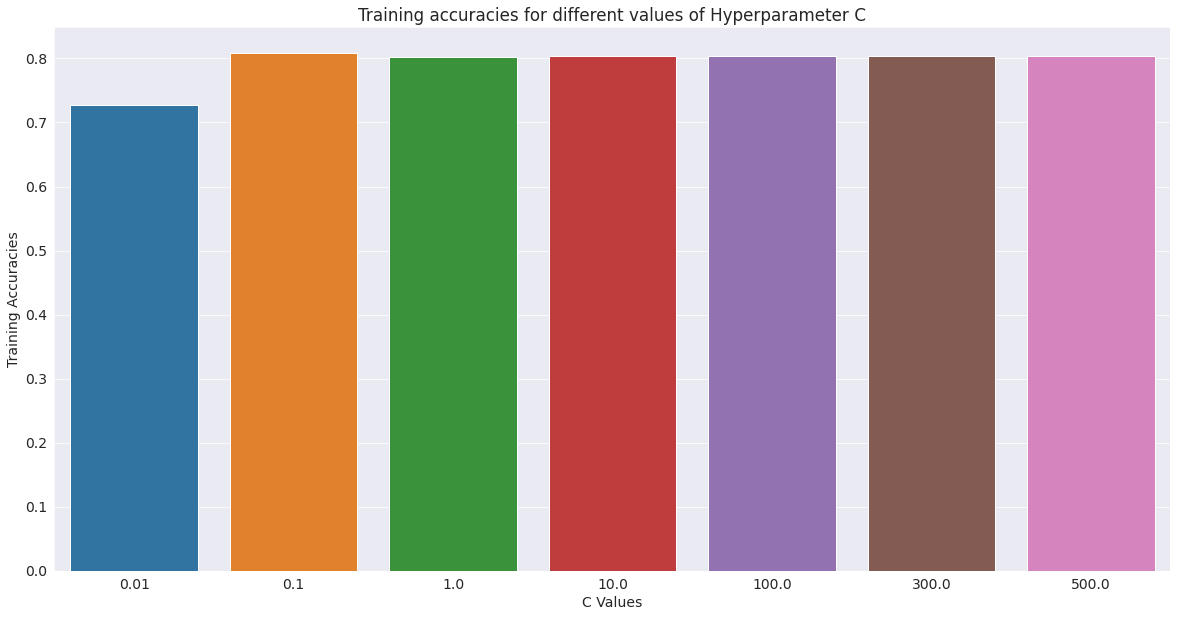

In [904]:
sns.barplot(x = 'C Values', y = 'Training Accuracies', data = tuned_df).set(title = 'Training accuracies for different values of Hyperparameter C');

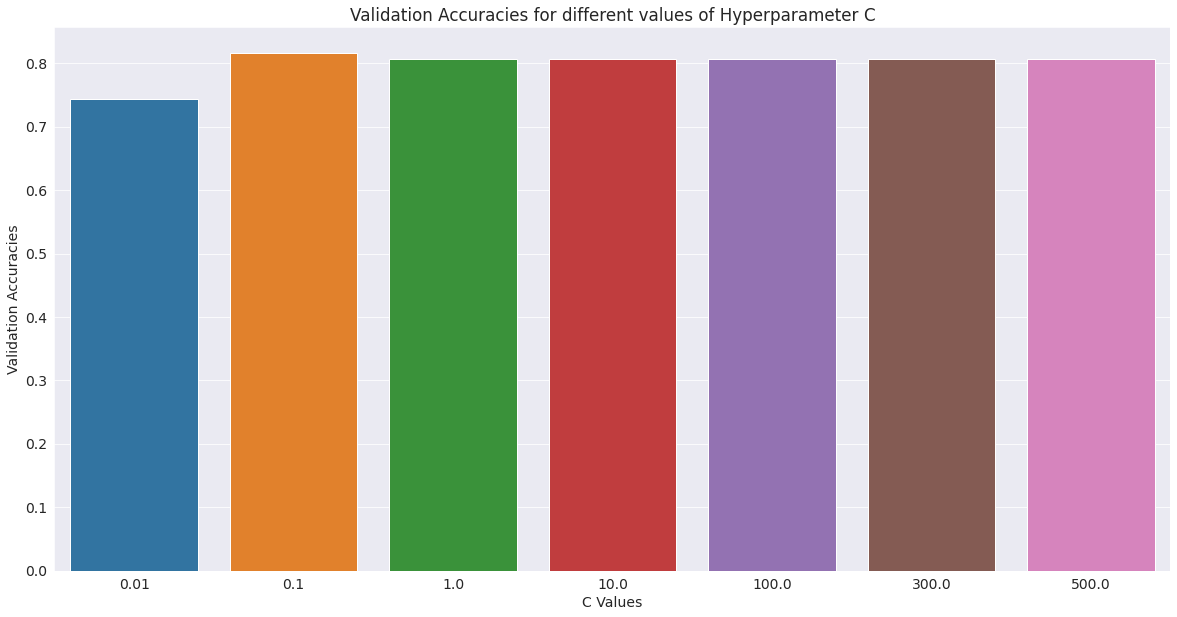

In [905]:
sns.barplot(x = 'C Values', y = 'Validation Accuracies', data = tuned_df).set(title = 'Validation Accuracies for different values of Hyperparameter C');

We can clearly see that our model performs best on both training and testing accuracy when C is set to 0.1. Thus, we will tune our model that way.
 













<b> Tuning Hyperparameter fit_intercept </b>

In [906]:
fit_intercept_values = [True,False]

# when fit_intercept = True
log_reg = LogisticRegression(n_jobs = -1, random_state = 42, C = 0.1, max_iter = 150, fit_intercept = True)
log_reg.fit(X_train,y_train)
training_scores1 = accuracy_score(y_train, log_reg.predict(X_train))
validation_scores1 = accuracy_score(y_val, log_reg.predict(X_val))

# when fit_intercept = False
log_reg = LogisticRegression(n_jobs = -1, random_state = 42, C = 0.1, max_iter = 150, fit_intercept = False)
log_reg.fit(X_train,y_train)
training_scores2 = accuracy_score(y_train, log_reg.predict(X_train))
validation_scores2 = accuracy_score(y_val, log_reg.predict(X_val))

In [907]:
dict1 = {
    'Models':['training_scores1','validation_scores1','training_scores2','validation_scores2'],
    #'Training Accuracy':[training_scores1,training_scores2],
    #'Validation Accuracy':[validation_scores1,validation_scores2],
    'Accuracies':[training_scores1,validation_scores1,training_scores2,validation_scores2],
    'fit_intercept':[True,True,False,False]
}

tuned_df = pd.DataFrame(dict1)
tuned_df

,Models,Accuracies,fit_intercept
0,training_scores1,0.808383,True
1,validation_scores1,0.816143,True
2,training_scores2,0.793413,False
3,validation_scores2,0.789238,False


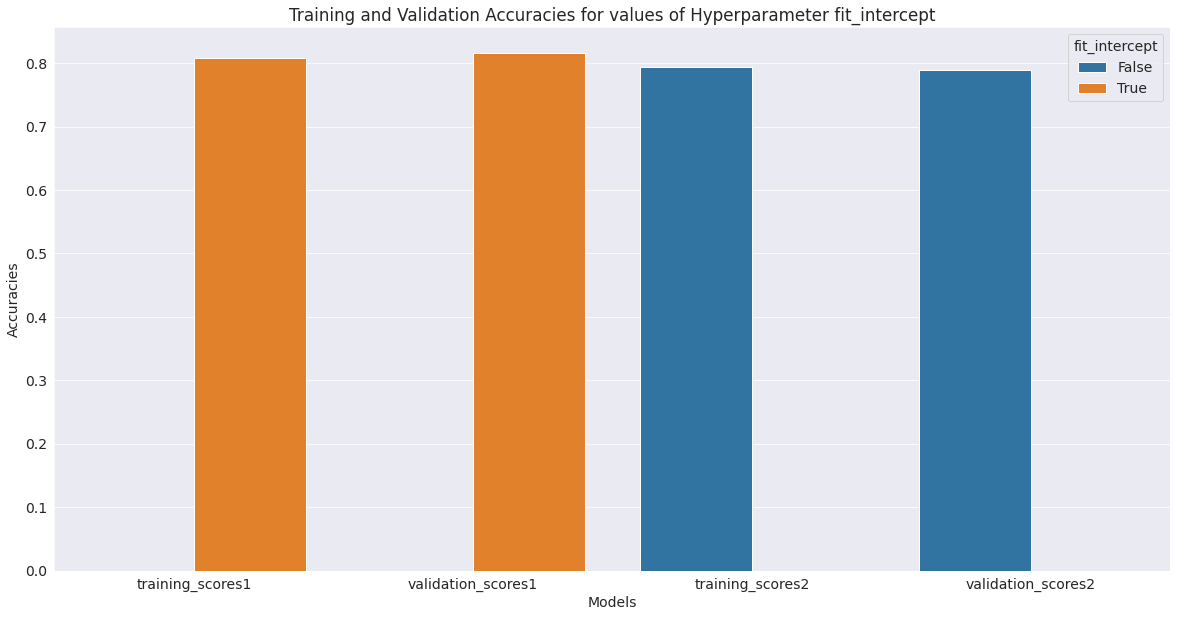

In [908]:
sns.barplot(x = 'Models',y='Accuracies',data = tuned_df,hue = 'fit_intercept').set(title = 'Training and Validation Accuracies for values of Hyperparameter fit_intercept');

We can clearly see that our model performs better on both training and validation set when fit_intercept is True. Thus, we will tune our model that way.

In [909]:
# our final optimized model
log_reg = LogisticRegression(n_jobs = -1, max_iter = 150, C = 0.1, fit_intercept = True, random_state = 42)

#### Using K-Fold Cross Validation

In [910]:
from sklearn.model_selection import cross_val_score
cv_train = cross_val_score(log_reg,X_train,y_train,cv = 20, scoring = 'accuracy')
cv_validation = cross_val_score(log_reg,X_val,y_val,cv = 20, scoring = 'accuracy')

In [911]:
print('Our mean cross validated accuracy on Training data = ',cv_train.mean())

Our mean cross validated accuracy on Training data =  0.7991532976827094


In [912]:
print('Our mean cross validated accuracy on Validation data = ',cv_validation.mean())

Our mean cross validated accuracy on Validation data =  0.7950757575757574


#### Confusion Matrix for Logistic Regression Model

In [913]:
# best tuned logistic regression model
log_reg = LogisticRegression(n_jobs = -1, random_state = 42, C = 0.1, fit_intercept = True, max_iter = 150).fit(X_train,y_train)

In [914]:
from sklearn.metrics import confusion_matrix

# confusion matrix for validation data
cm = confusion_matrix(y_val,log_reg.predict(X_val))
cm

array([[117,  17],
       [ 24,  65]])

In [915]:
True_Positive = TP = cm[1,1]
True_Negative = TN = cm[0,0]
False_Positive = FP = cm[0,1]
False_Negative = FN = cm[1,0]

In [916]:
True_Positive,True_Negative,False_Positive,False_Negative

(65, 117, 17, 24)

<b> Classification Error </b>

How often is the classifier incorrect?

In [917]:
print((FP+FN)/ float(TP+TN+FP+FN))
print(1 - (accuracy_score(y_val, log_reg.predict(X_val))))

0.18385650224215247
0.18385650224215244


<b> Sensitivity </b>

When the actual value is positive(1), how often is prediction correct ?

In [918]:
from sklearn import metrics

print(TP /float(TP+FN))
print(metrics.recall_score(y_val,log_reg.predict(X_val), pos_label=1))

0.7303370786516854
0.7303370786516854


<b> Specificity </b>

When the actual value is negative, how often is the prediction correct ?

In [919]:
print(TN/float(TN + FP))

0.8731343283582089


<b> False Positive Rate </b>

When actual value is negative, how often is the prediction negative ?

In [920]:
print(FP/float(TN+FP)) # note: False positive rate = (1 - specificity)

0.12686567164179105


<b> Prediction</b>

When a positive value is predicted, how often is prediction correct ?

In [921]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_val,log_reg.predict(X_val),pos_label=1))

0.7926829268292683
0.7926829268292683


#### Making Predictions on Testing Data

In [922]:
# making predictions on testing data
test_predictions = log_reg.predict(test_df)

In [923]:
testing_accuracy = accuracy_score(submission_df.Survived, test_predictions)
testing_accuracy

0.9186602870813397

<b> Our optimized Logistic Regression model has a testing accuracy of almost 92 %. This is a very very good model. But, we will continue testing other models to find if other models will outperform this model or not.

#### Saving the final Predictions for submission on kaggle

In [924]:
# lets create a csv file and save our prediction for this logistic regression model to be uploaded in kaggle
solution_df = submission_df.copy()
solution_df.Survived = test_predictions

In [925]:
# saving out predictions to a new file called 'submission_logisticregression.csv'
solution_df.to_csv('submission_logisticregression.csv', index = False)

### <b> Descision Tree Model

#### Training the Descision Tree Model

In [926]:
# importing our descision Tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42).fit(X_train,y_train)

In [927]:
# accuracy score for training data
accuracy_score(y_train,tree.predict(X_train))

0.9820359281437125

In [928]:
# accuracy score for valdiation set
accuracy_score(y_val,tree.predict(X_val))

0.726457399103139

Our accuracy in the training set is almost 99 % ,whereas in validation set, it is on;y 72 %. This means our descision tree model is overfitting on the training data. Thus, we need to perform `Hyperparameter Tuning` for our Descison Tree Model to prevent overfitting. We will do so in next step.

In [929]:
y_train.value_counts()/len(y_train)

0    0.621257
1    0.378743
Name: Survived, dtype: float64

Furthermore, we can clearly see that even  a dumb model that randomly selects 0 and 1 will have a probability of choosing 0 for 62% times. Thus our model is not good whatsoever.

#### Tree Visualization and Feature Importance


In [930]:
from sklearn.tree import plot_tree, export_text

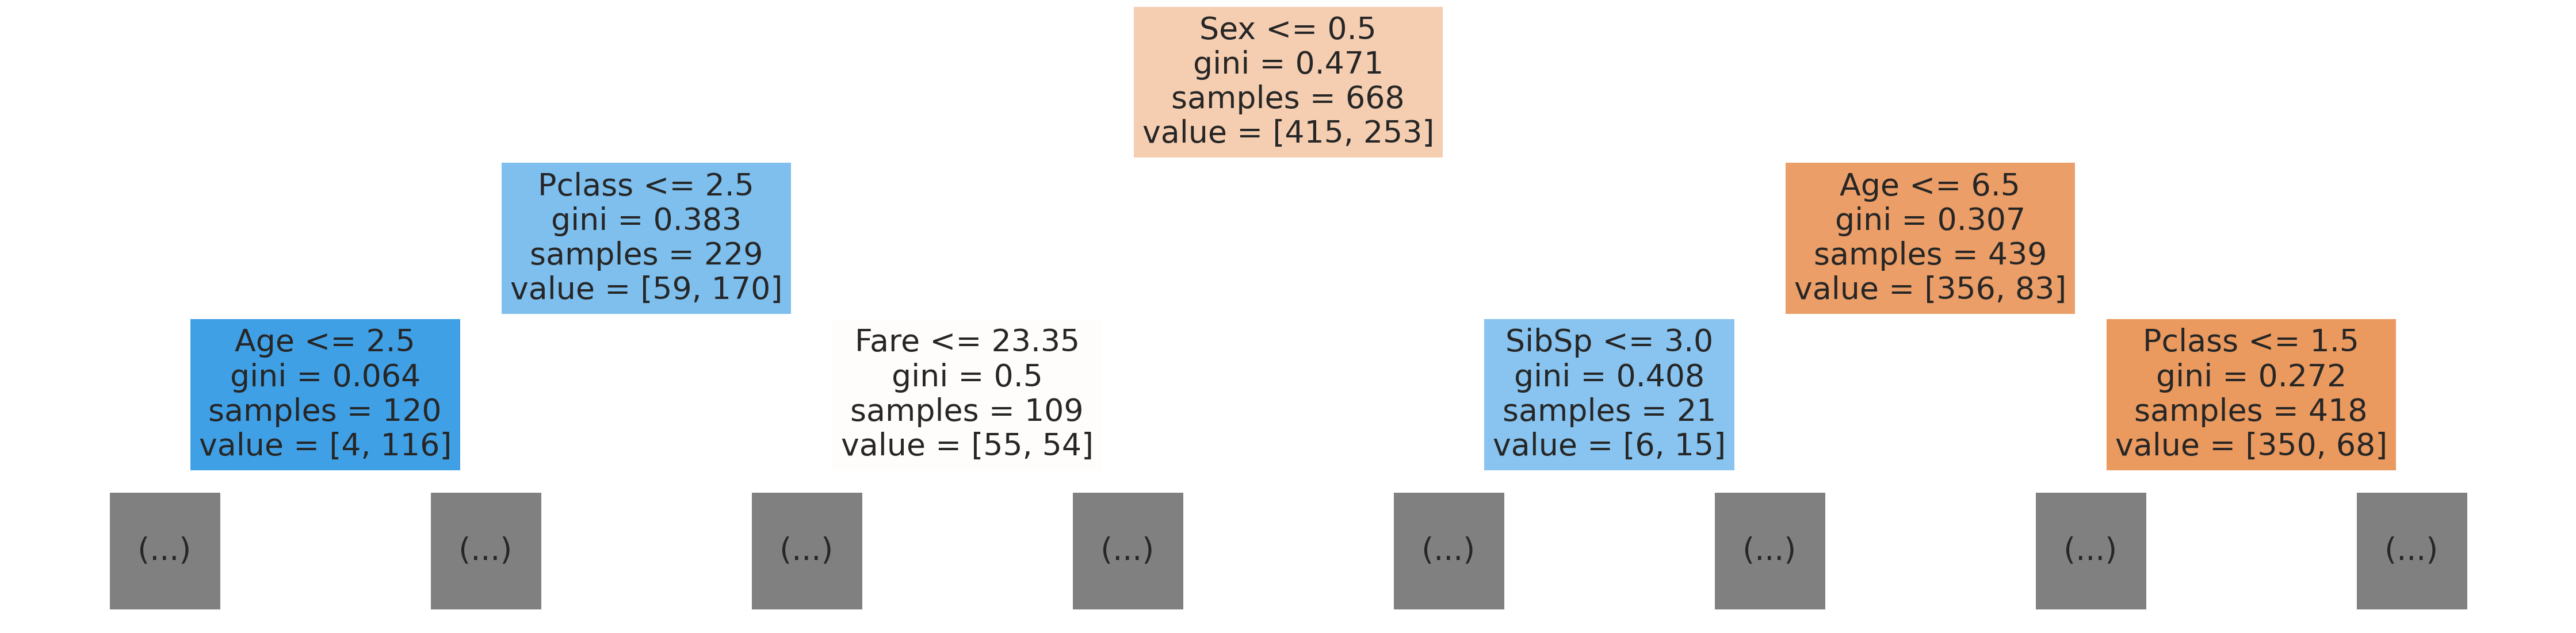

In [931]:
plt.figure(figsize=(80,20))
plot_tree(tree, feature_names = X_train.columns,filled = True, max_depth =2);

In [932]:
tree.tree_.max_depth  #suruko tree vaneko teo model ho tree = DescisionTree() wala ra tespaxiko tree sabai pure syntax ho

18

The default depth of our descision tree is calculated to be 18.

In [933]:
tree_text = export_text(tree, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Age <= 24.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  24.50
|   |   |   |   |--- Age <= 26.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  26.00
|   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |--- Fare <= 17.43
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  17.43
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |--- Age <= 49.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  49.50
|   |   |   |   |   |   |   |--- Age <= 50.50
|   |   |   |   |   |   |   |   |--- Fare <= 19.61
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Fare >  19.61
|   |   |   |   |   |   |

In [934]:
# feature importances
tree.feature_importances_

array([0.10764664, 0.30686413, 0.26142344, 0.05661136, 0.02218982,
       0.21812118, 0.02714343])

In [935]:
importances = {
    'Features':X_train.columns,
    'Weights':tree.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

,Features,Weights
1,Sex,0.306864
2,Age,0.261423
5,Fare,0.218121
0,Pclass,0.107647
3,SibSp,0.056611
6,Embarked,0.027143
4,Parch,0.022190


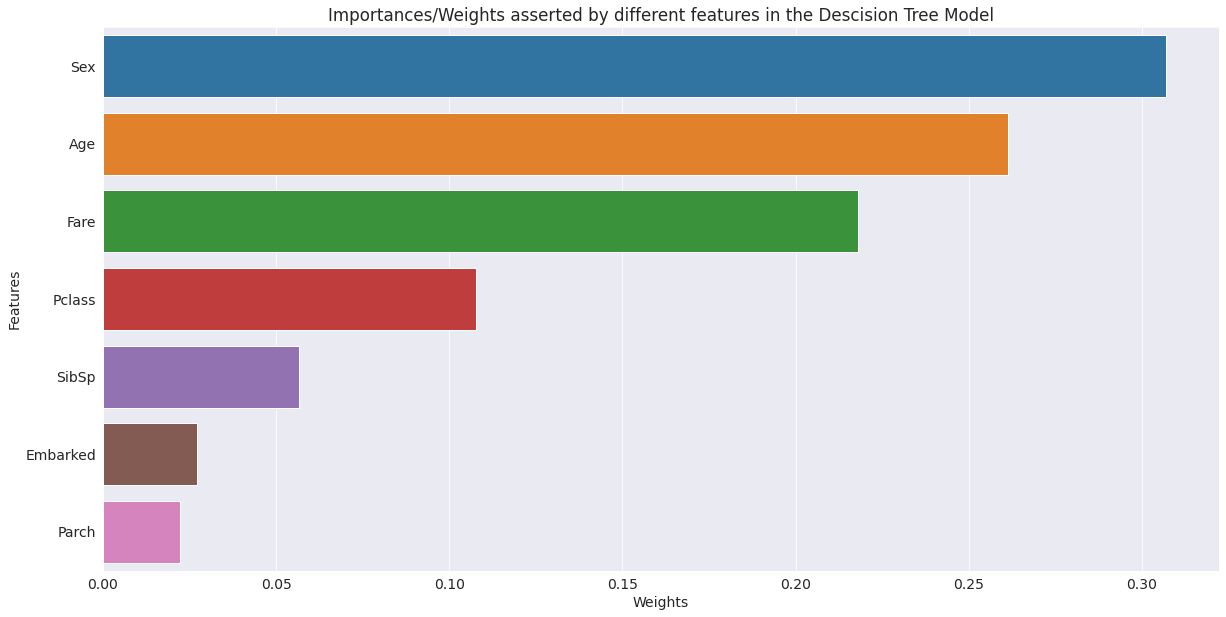

In [936]:
plt.title("Importances/Weights asserted by different features in the Descision Tree Model")
sns.barplot(x = 'Weights', y ='Features', data = importances);

It looks our model is mostly weighted by the Sex feature.


#### Hyperparameter Tuning for the Descision Tree Model

We will be tuning the following Hyperparameters:

  1. max_depth

  2. max_leaf_nodes

<b> Tuning the Hyperparameter max_depth </b>

In [937]:
# our default max_Depth
tree.tree_.max_depth

18

In [938]:
max_depth_values = list(range(2,24,2))

training_error = []
validation_error = []

In [939]:
for i in max_depth_values:
  tree = DecisionTreeClassifier(random_state = 42, max_depth = i).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,tree.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,tree.predict(X_val))))

In [940]:
errors_df = pd.DataFrame({
    'Max Depth':max_depth_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,Max Depth,Training Error,Validation Error
0,2,0.197605,0.224215
1,4,0.157186,0.192825
2,6,0.142216,0.233184
3,8,0.103293,0.233184
4,10,0.065868,0.255605
5,12,0.043413,0.255605
6,14,0.023952,0.273543
7,16,0.020958,0.273543
8,18,0.017964,0.273543
9,20,0.017964,0.273543


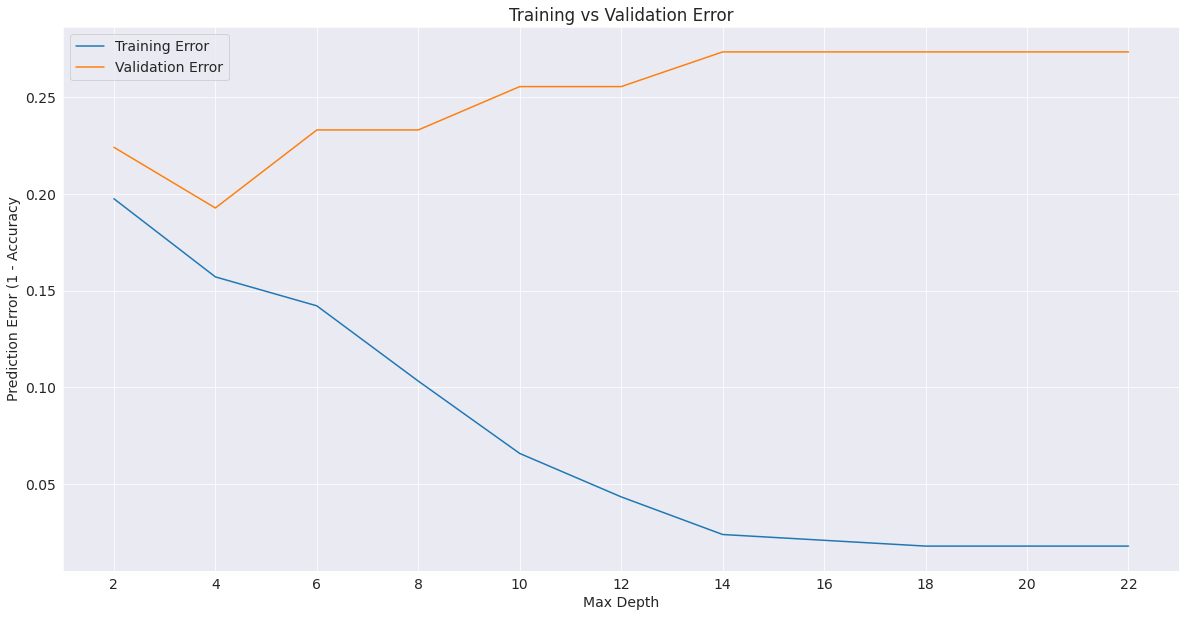

In [941]:
# plotting in graph
plt.title('Training vs Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy')
plt.plot(errors_df['Max Depth'], errors_df["Training Error"])
plt.plot(errors_df['Max Depth'], errors_df["Validation Error"])
plt.xticks(range(2,24,2))
plt.legend(['Training Error','Validation Error']);

We can clearly see that the when max_depth = 4, our validation error starts to increase whereas training error continues to decrease. This gives us the indication that our model starts to overfit with the training data after max_depth increases than 4. Thus, max_depth = 4 is the optimal tuning for this model.

<b> Tuning the Hyperparameter max_leaf_nodes </b>

By default, max_leaf_nodes is set to None. If None then unlimited number of leaf nodes.

In [942]:
max_leaf_nodes_values = [2 ** i for i in range(1,11)]

training_error = []
validation_error = []

In [943]:
for i in max_leaf_nodes_values:
  tree = DecisionTreeClassifier(random_state = 42, max_depth = 4, max_leaf_nodes = i).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,tree.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,tree.predict(X_val))))

In [944]:
errors_df = pd.DataFrame({
    'Max_leaf_nodes':max_leaf_nodes_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,Max_leaf_nodes,Training Error,Validation Error
0,2,0.212575,0.215247
1,4,0.197605,0.224215
2,8,0.161677,0.192825
3,16,0.157186,0.192825
4,32,0.157186,0.192825
5,64,0.157186,0.192825
6,128,0.157186,0.192825
7,256,0.157186,0.192825
8,512,0.157186,0.192825
9,1024,0.157186,0.192825


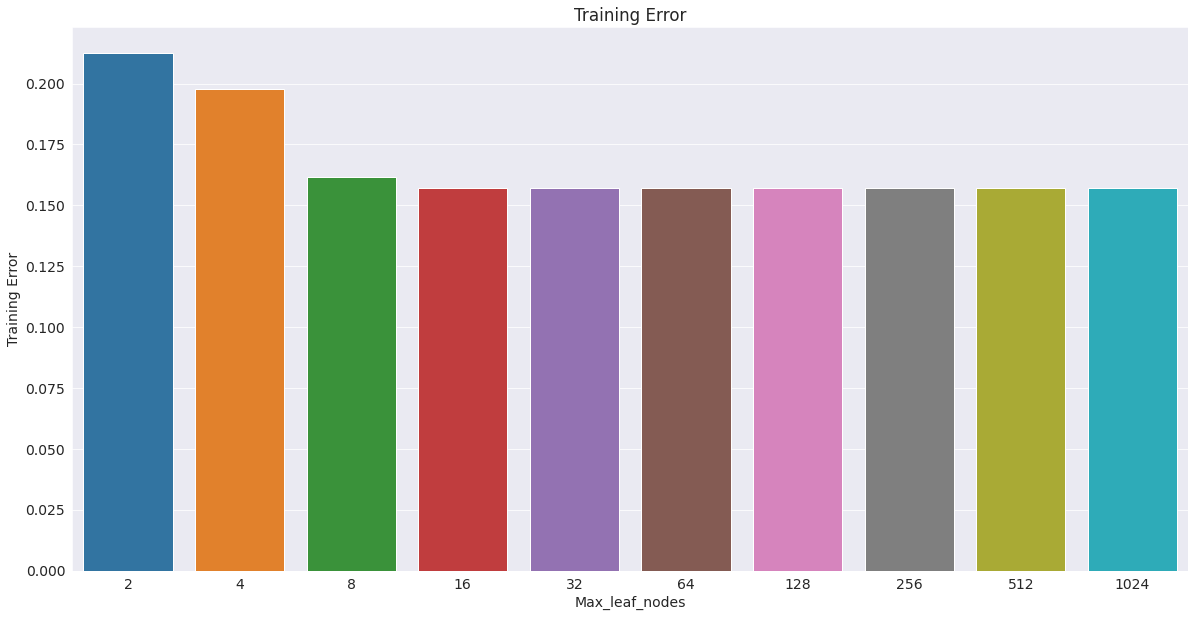

In [945]:
# plotting in graph
plt.title('Training Error')
sns.barplot(x = 'Max_leaf_nodes', y = 'Training Error', data = errors_df);

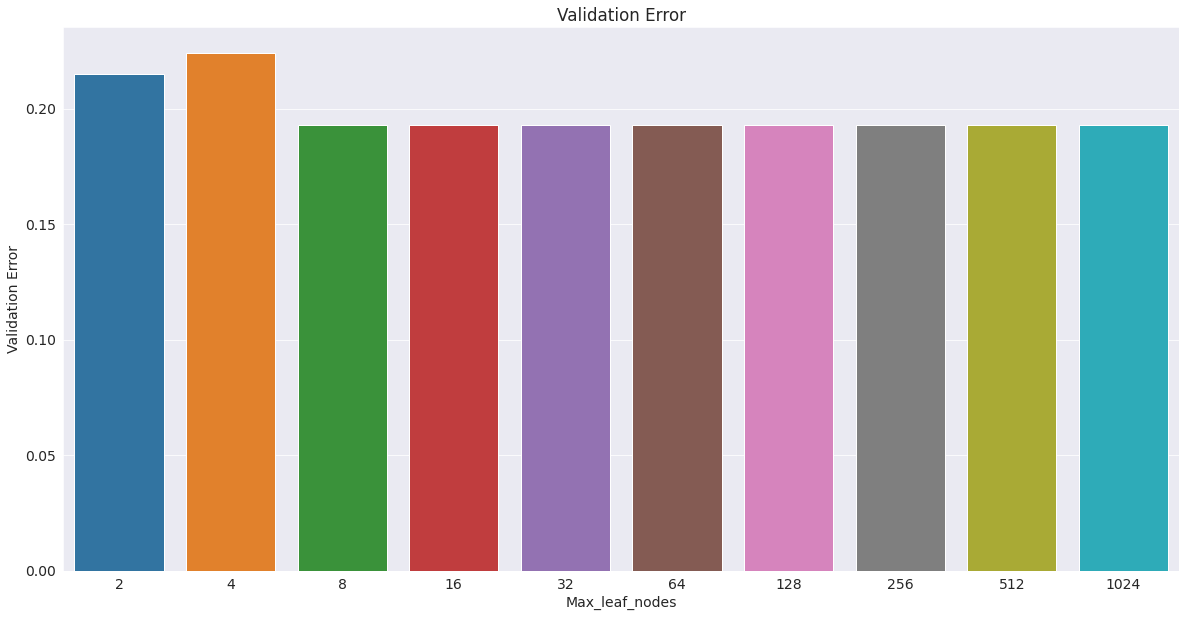

In [946]:
# plotting in graph
plt.title('Validation Error')
sns.barplot(x = 'Max_leaf_nodes', y = 'Validation Error', data = errors_df);

Thus, our best tuned model has max_leaf_nodes set to 16.

#### Using K-Fold Cross Validation

In [947]:
# our best tuned model
tree = DecisionTreeClassifier(random_state = 42, max_leaf_nodes = 16, max_depth = 4).fit(X_train,y_train)

In [948]:
cv_train = cross_val_score(tree, X_train, y_train, cv = 20, scoring = 'accuracy')
cv_validation = cross_val_score(tree, X_val, y_val, cv = 20, scoring = 'accuracy')

In [949]:
print('Our mean cross validated accuracy on Training data = ',cv_train.mean())

Our mean cross validated accuracy on Training data =  0.8217023172905525


In [950]:
print('Our mean cross validated accuracy on Validation data = ',cv_validation.mean())

Our mean cross validated accuracy on Validation data =  0.7393939393939395


#### Confusion Matrix for Descision Tree Model

In [951]:
cm = confusion_matrix(y_val,tree.predict(X_val))
cm

array([[119,  15],
       [ 28,  61]])

In [952]:
True_Positive = TP = cm[1,1]
True_Negative = TN = cm[0,0]
False_Positive = FP = cm[0,1]
False_Negative = FN = cm[1,0]

In [953]:
True_Positive,True_Negative,False_Positive,False_Negative

(61, 119, 15, 28)

<b> Classification Error </b>

How often is the classifier incorrect?

In [954]:
print((FP+FN)/ float(TP+TN+FP+FN))
print(1 - (accuracy_score(y_val, tree.predict(X_val))))

0.19282511210762332
0.19282511210762332


<b> Sensitivity </b>

When the actual value is positive(1), how often is prediction correct ?

In [955]:
from sklearn import metrics

print(TP /float(TP+FN))
print(metrics.recall_score(y_val,tree.predict(X_val), pos_label=1))

0.6853932584269663
0.6853932584269663


<b> Specificity </b>

When the actual value is negative, how often is the prediction correct ?

In [956]:
print(TN/float(TN + FP))

0.8880597014925373


<b> False Positive Rate </b>

When actual value is negative, how often is the prediction negative ?

In [957]:
print(FP/float(TN+FP)) # note: False positive rate = (1 - specificity)

0.11194029850746269


<b> Prediction</b>

When a positive value is predicted, how often is prediction correct ?

In [958]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_val,tree.predict(X_val),pos_label=1))

0.8026315789473685
0.8026315789473685


#### Making Predictions on Testing set and Saving the Predictions for Submission on Kaggle

In [959]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [960]:
test_predictions = tree.predict(test_df)

In [961]:
# lets create a csv file and save our prediction for this descision tree model to be uploaded in kaggle
solution_df = submission_df.copy()
solution_df.Survived = test_predictions

In [962]:
# saving out predictions to a new file called 'submission_DescisionTree.csv'
solution_df.to_csv('submission_DescisionTree.csv', index = False)

#### Conclusion

In the logistic Regression model, our accuracy after submitting the file in kaggle was 76.6 % on the testing data. But, our descision tree model has scored 77.3 % accuracy on kaggle. Thus, among the three models we have trained, descision tree is calculated to be the best.

### <b> Random Forest Model </b>

#### Training the Random Forest Model

In [963]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train,y_train)

In [964]:
accuracy_score(y_train, forest.predict(X_train))

0.9820359281437125

In [965]:
accuracy_score(y_val,forest.predict(X_val))

0.7892376681614349

Our accuracy in the training set is almost 99 % ,whereas in validation set, it is on;y 79 %. This means our random forest model is overfitting on the training data. Thus, we need to perform `Hyperparameter Tuning` for our random forest Model to prevent overfitting. We will do so in next step.

In [966]:
y_train.value_counts()/len(y_train)

0    0.621257
1    0.378743
Name: Survived, dtype: float64

Furthermore, we can clearly see that even  a dumb model that randomly selects 0 and 1 will have a probability of choosing 0 for 62% times. Thus our model is not good whatsoever.

#### Tree Visualization and Feature Importance

In [967]:
forest.classes_

array([0, 1])

By default, there are 100 descision trees in the random forest classifier model. i.e n_estimators = 100

In [968]:
# selecting the first descision tree
forest.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best')

In [969]:
# selecting the last descision tree
forest.estimators_[99]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=134489564, splitter='best')

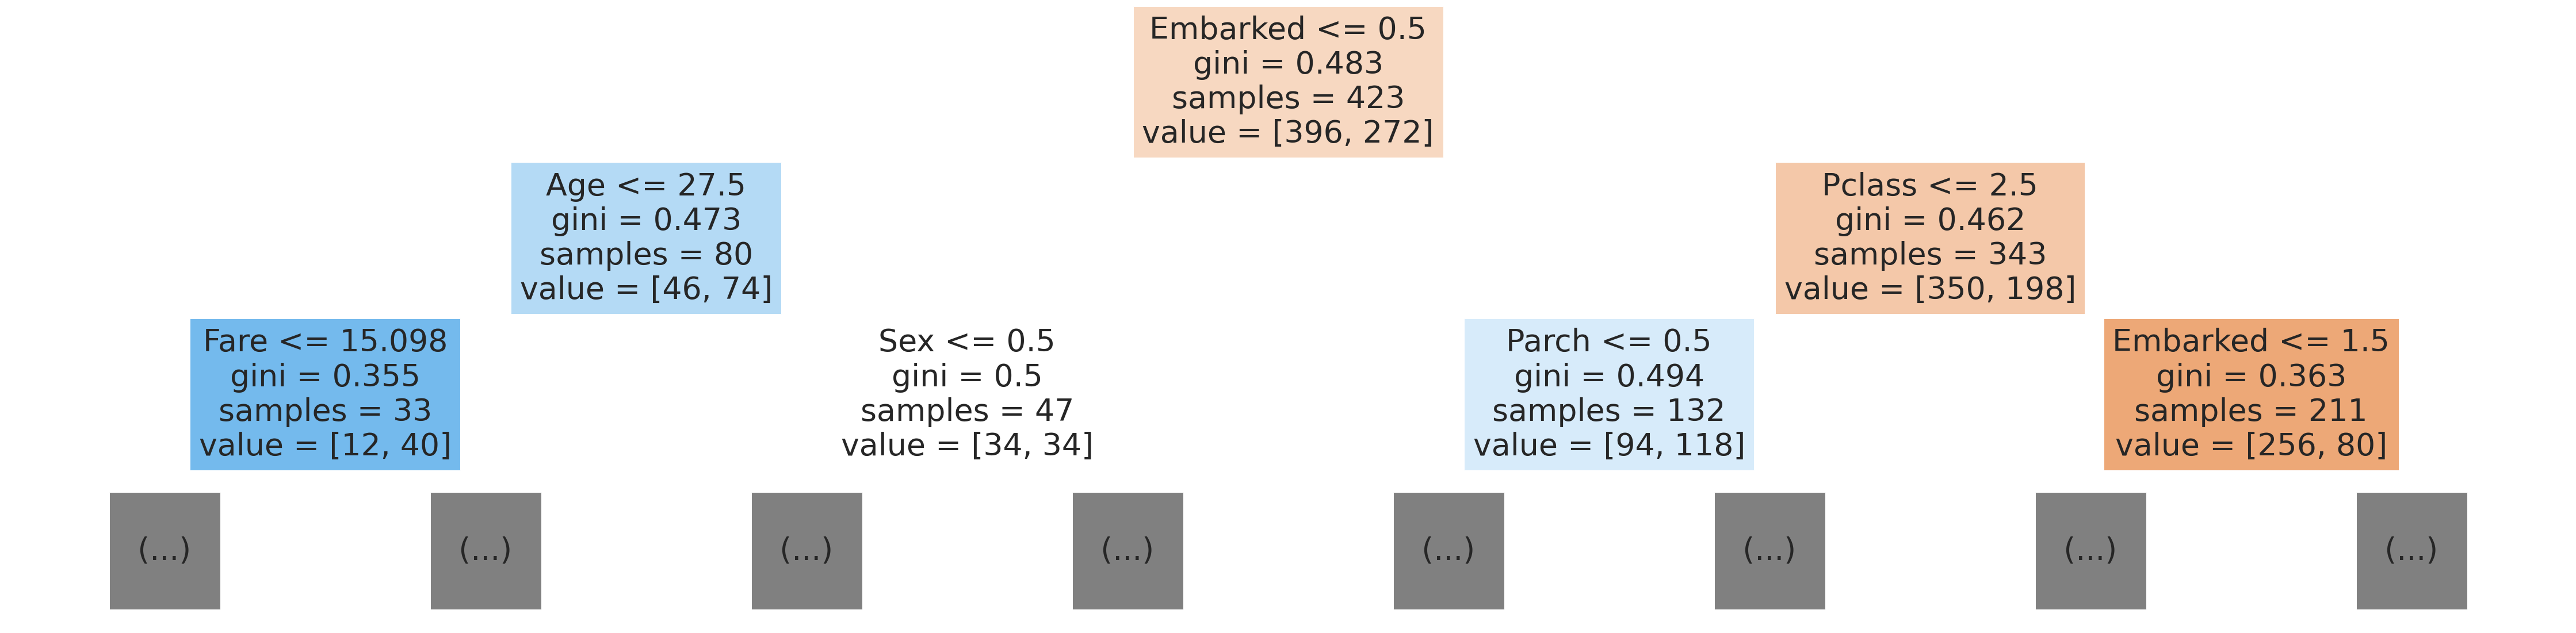

In [970]:
# displaying the first descision tree with max_depth set to 2
plt.figure(figsize=(80,20))
plot_tree(forest.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True);

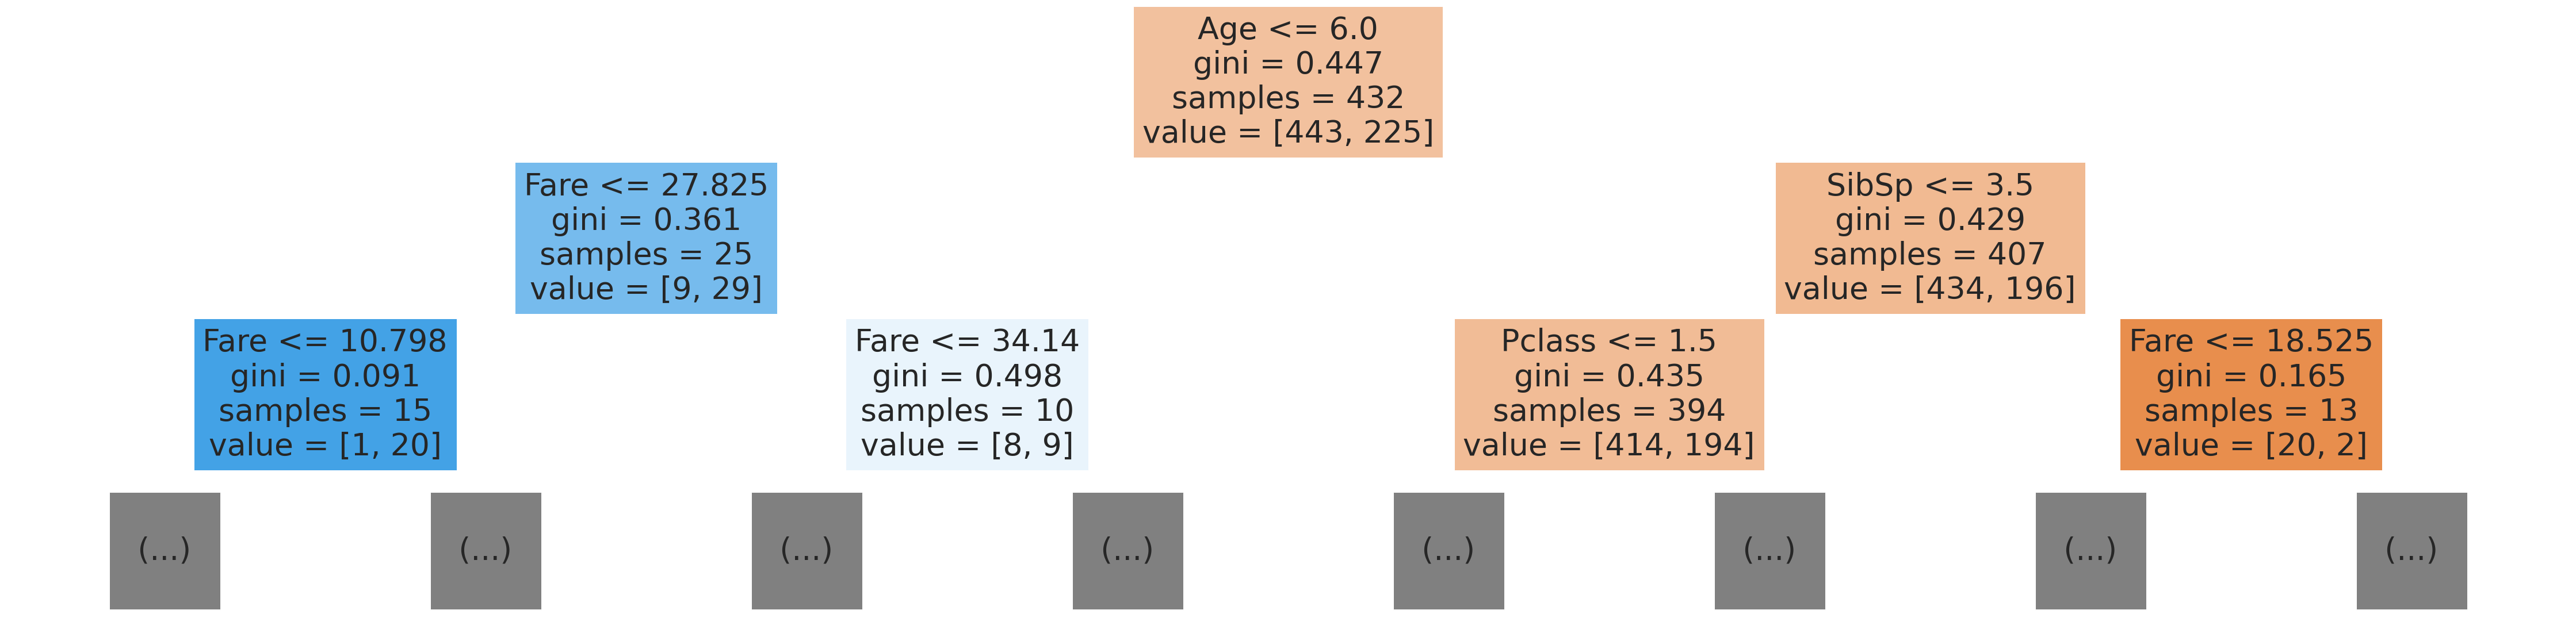

In [971]:
# displaying the last descision tree with max_depth set to 2
plt.figure(figsize=(80,20))
plot_tree(forest.estimators_[99], max_depth=2, feature_names=X_train.columns, filled=True);

In [972]:
len(forest.estimators_)

100

In [973]:
tree_text = export_text(forest.estimators_[0], max_depth=2, feature_names=list(X_train.columns))
print(tree_text)

|--- Embarked <= 0.50
|   |--- Age <= 27.50
|   |   |--- Fare <= 15.10
|   |   |   |--- truncated branch of depth 6
|   |   |--- Fare >  15.10
|   |   |   |--- truncated branch of depth 5
|   |--- Age >  27.50
|   |   |--- Sex <= 0.50
|   |   |   |--- truncated branch of depth 5
|   |   |--- Sex >  0.50
|   |   |   |--- truncated branch of depth 7
|--- Embarked >  0.50
|   |--- Pclass <= 2.50
|   |   |--- Parch <= 0.50
|   |   |   |--- truncated branch of depth 12
|   |   |--- Parch >  0.50
|   |   |   |--- truncated branch of depth 7
|   |--- Pclass >  2.50
|   |   |--- Embarked <= 1.50
|   |   |   |--- truncated branch of depth 8
|   |   |--- Embarked >  1.50
|   |   |   |--- truncated branch of depth 18



In [974]:
# feature importance
forest.feature_importances_

array([0.0854401 , 0.26611653, 0.25892539, 0.04823558, 0.03897216,
       0.26803834, 0.0342719 ])

In [975]:
importances = {
    'Features':X_train.columns,
    'Weights':tree.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

,Features,Weights
1,Sex,0.577650
0,Pclass,0.203698
2,Age,0.103567
5,Fare,0.069708
3,SibSp,0.042988
4,Parch,0.002388
6,Embarked,0.000000


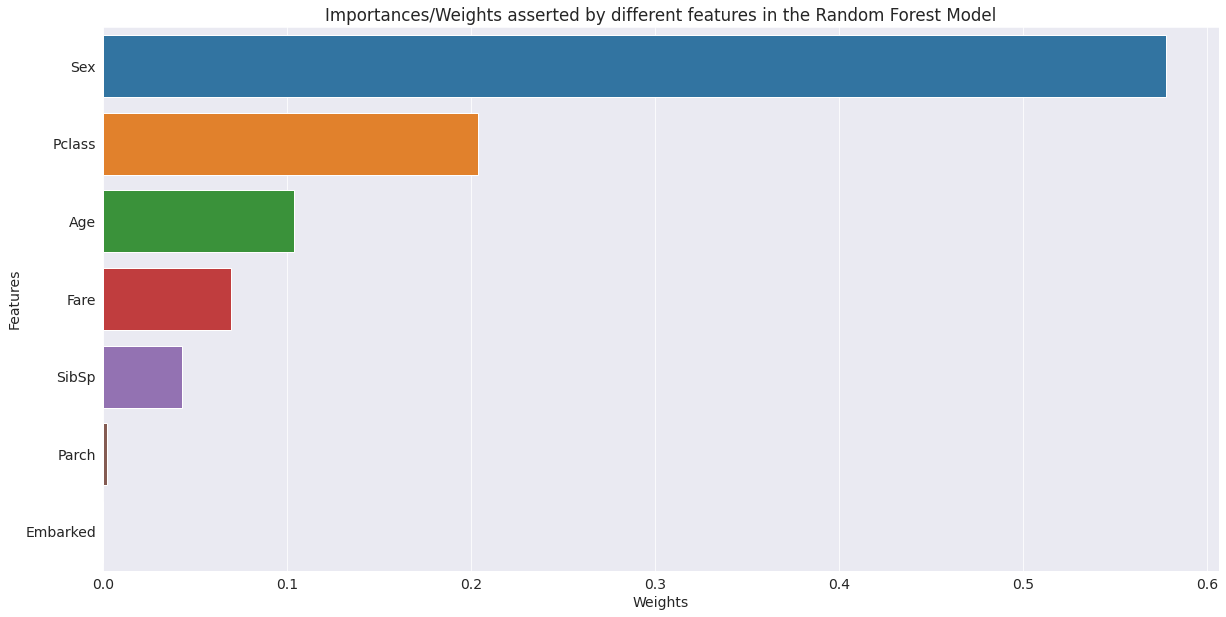

In [976]:
plt.title("Importances/Weights asserted by different features in the Random Forest Model")
sns.barplot(x = 'Weights', y ='Features', data = importances);

It looks like our random forest model is most affected by `Sex` feature.

#### Hyperparameter Tuning for Random Forest Model

We will tune the following hyperparameters for our random forest model:

  1. n_estimators (number of descision trees to use)

  2. max_depth

  3. max_leaf_nodes

<b> Tuning the hyperparameter n_estimators </b>

By default, the hyperparameter n_estimators is set to 100.

In [977]:
n_estimators_values = list(range(50,550,50))

training_error = []
validation_error = []

In [978]:
for j in n_estimators_values:
  forest = RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators=j).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,forest.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,forest.predict(X_val))))

In [979]:
errors_df = pd.DataFrame({
    'n_estimators':n_estimators_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,n_estimators,Training Error,Validation Error
0,50,0.020958,0.219731
1,100,0.017964,0.210762
2,150,0.017964,0.201794
3,200,0.017964,0.197309
4,250,0.017964,0.206278
5,300,0.017964,0.201794
6,350,0.017964,0.201794
7,400,0.017964,0.201794
8,450,0.017964,0.201794
9,500,0.017964,0.210762


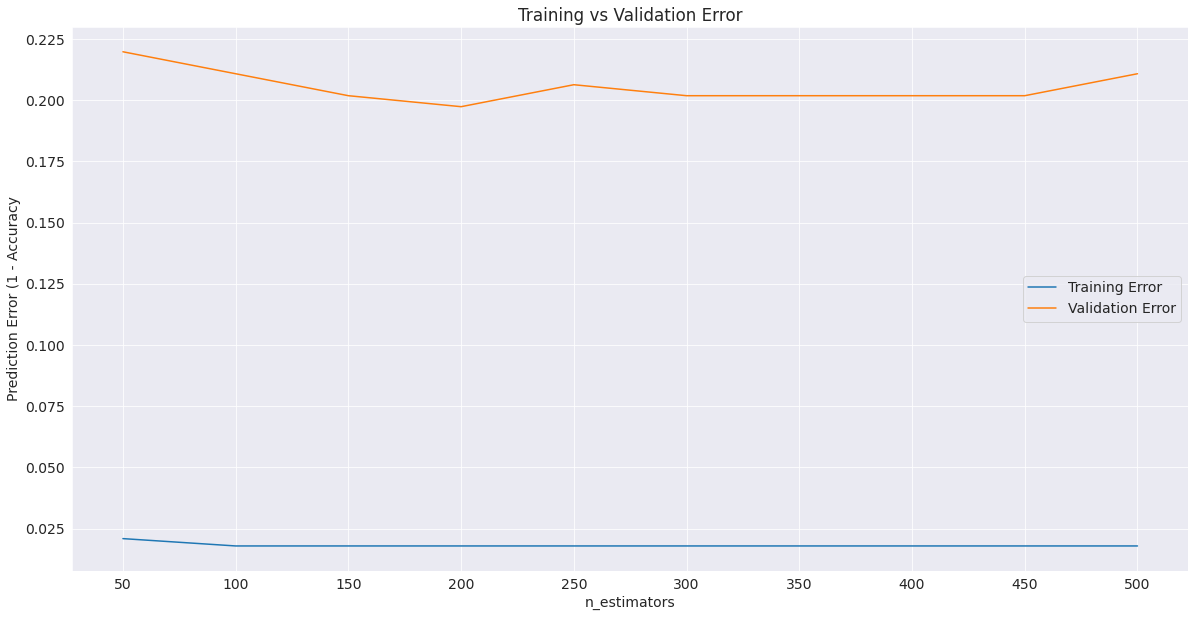

In [980]:
# plotting in graph
plt.title('Training vs Validation Error')
plt.xlabel('n_estimators')
plt.ylabel('Prediction Error (1 - Accuracy')
plt.plot(errors_df['n_estimators'], errors_df["Training Error"])
plt.plot(errors_df['n_estimators'], errors_df["Validation Error"])
plt.xticks(n_estimators_values)
plt.legend(['Training Error','Validation Error']);

Our validation error is lowest when n_estimators = 200. Thus, we will tune our model that way.

<b> Tuning the Hyperparameter max_depth </b>

In [981]:
max_depth_values = list(range(2,24,2))

training_error = []
validation_error = []

In [982]:
for i in max_depth_values:
  forest = RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators=200, max_depth = i).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,forest.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,forest.predict(X_val))))

In [983]:
errors_df = pd.DataFrame({
    'Max Depth':max_depth_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,Max Depth,Training Error,Validation Error
0,2,0.187126,0.197309
1,4,0.143713,0.174888
2,6,0.122754,0.179372
3,8,0.086826,0.174888
4,10,0.053892,0.183857
5,12,0.034431,0.201794
6,14,0.023952,0.201794
7,16,0.017964,0.201794
8,18,0.017964,0.197309
9,20,0.017964,0.197309


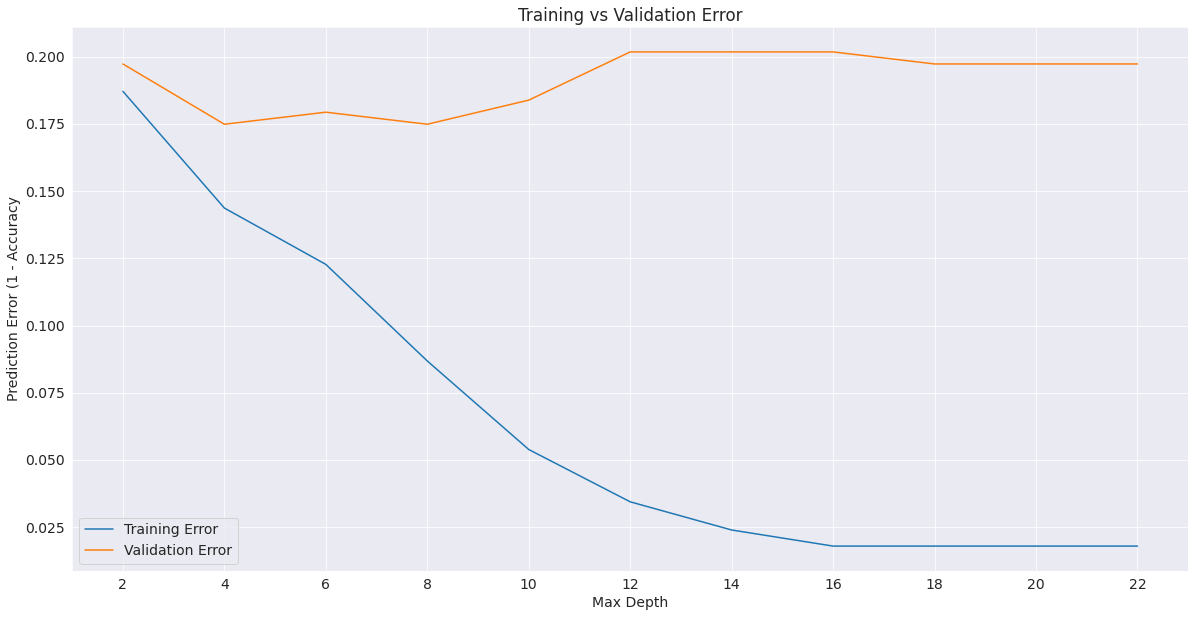

In [984]:
# plotting in graph
plt.title('Training vs Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy')
plt.plot(errors_df['Max Depth'], errors_df["Training Error"])
plt.plot(errors_df['Max Depth'], errors_df["Validation Error"])
plt.xticks(range(2,24,2))
plt.legend(['Training Error','Validation Error']);

It looks like our model will perform best if max_depth = 8. Thus, we will tune our model that way. This will also prevent our model from overfitting on training data.

<b> Tuning the Hyperparameter ma_leaf_nodes </b>

By default, max_leaf_nodes is set to None. If None then unlimited number of leaf nodes.

In [985]:
max_leaf_nodes_values = [2 ** i for i in range(1,11)]

training_error = []
validation_error = []

In [986]:
for i in max_leaf_nodes_values:
  forest = RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators=200, max_depth = 8, max_leaf_nodes = i).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,forest.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,forest.predict(X_val))))

In [987]:
errors_df = pd.DataFrame({
    'Max_leaf_nodes':max_leaf_nodes_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,Max_leaf_nodes,Training Error,Validation Error
0,2,0.205090,0.215247
1,4,0.193114,0.201794
2,8,0.154192,0.179372
3,16,0.131737,0.183857
4,32,0.113772,0.188341
5,64,0.088323,0.170404
6,128,0.085329,0.170404
7,256,0.085329,0.170404
8,512,0.085329,0.170404
9,1024,0.085329,0.170404


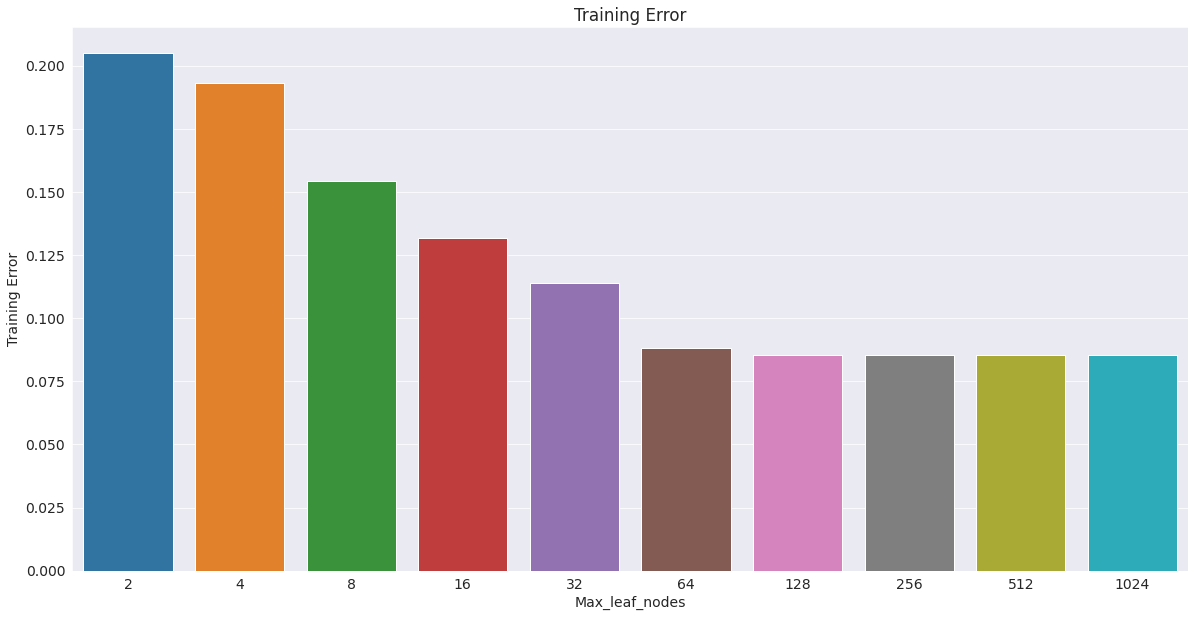

In [988]:
# plotting in graph
plt.title('Training Error')
sns.barplot(x = 'Max_leaf_nodes', y = 'Training Error', data = errors_df);

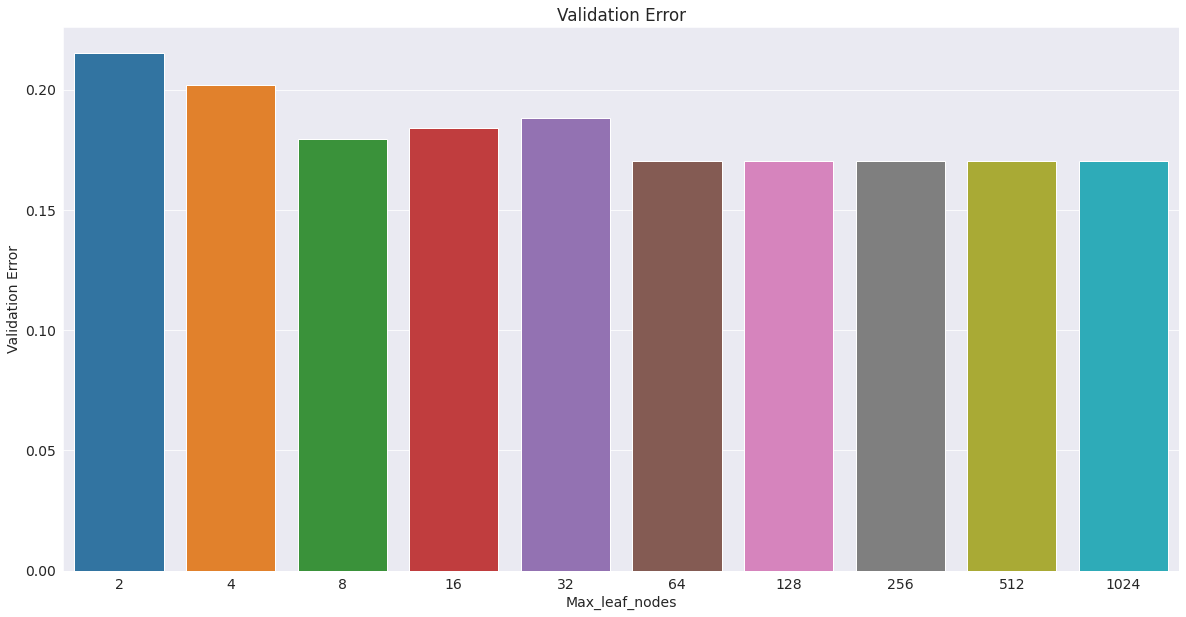

In [989]:
# plotting in graph
plt.title('Validation Error')
sns.barplot(x = 'Max_leaf_nodes', y = 'Validation Error', data = errors_df);

We can clearly see that our model will perform best if max_leaf_nodes is set to 64. Thus, we will tune our model that way.

#### Using K-Fold Cross Validation

In [990]:
# our best tuned random forest model
forest = RandomForestClassifier(n_jobs = -1, random_state = 42, max_leaf_nodes = 64, max_depth = 8, n_estimators = 200).fit(X_train,y_train)

In [991]:
cv_train = cross_val_score(forest, X_train, y_train, cv = 20, scoring = 'accuracy')
cv_validation = cross_val_score(forest, X_val, y_val, cv = 20, scoring = 'accuracy')

In [992]:
print('Our mean cross validated accuracy on Training data = ',cv_train.mean())

Our mean cross validated accuracy on Training data =  0.8290998217468806


In [993]:
print('Our mean cross validated accuracy on Validation data = ',cv_validation.mean())

Our mean cross validated accuracy on Validation data =  0.803030303030303


#### Confusion Matrix for Random Forest Model

In [994]:
cm = confusion_matrix(y_val, forest.predict(X_val))
cm

array([[122,  12],
       [ 26,  63]])

In [995]:
True_Positive = TP = cm[1,1]
True_Negative = TN = cm[0,0]
False_Positive = FP = cm[0,1]
False_Negative = FN = cm[1,0]

In [996]:
True_Positive,True_Negative,False_Positive,False_Negative

(63, 122, 12, 26)

<b> Classification Error </b>

How often is the classifier incorrect?

In [997]:
print((FP+FN)/ float(TP+TN+FP+FN))
print(1 - (accuracy_score(y_val, forest.predict(X_val))))

0.17040358744394618
0.17040358744394624


<b> Sensitivity </b>

When the actual value is positive(1), how often is prediction correct ?

In [998]:
from sklearn import metrics

print(TP /float(TP+FN))
print(metrics.recall_score(y_val,forest.predict(X_val), pos_label=1))

0.7078651685393258
0.7078651685393258


<b> Specificity </b>

When the actual value is negative, how often is the prediction correct ?

In [999]:
print(TN/float(TN + FP))

0.9104477611940298


<b> False Positive Rate </b>

When actual value is negative, how often is the prediction negative ?

In [1000]:
print(FP/float(TN+FP)) # note: False positive rate = (1 - specificity)

0.08955223880597014


<b> Prediction</b>

When a positive value is predicted, how often is prediction correct ?

In [1001]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_val,forest.predict(X_val),pos_label=1))

0.84
0.84


#### Making Predictions on Testing set and Saving the Predictions for Submission on Kaggle

In [1002]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [1003]:
test_predictions = forest.predict(test_df)

In [1004]:
# lets create a csv file and save our prediction for this random forest model to be uploaded in kaggle
solution_df = submission_df.copy()
solution_df.Survived = test_predictions

In [1005]:
# saving out predictions to a new file called 'submission_randomforest.csv'
solution_df.to_csv('submission_randomforest.csv', index = False)

#### Conclusion

In the Descision Tree model, our accuracy after submitting the file in kaggle was 77.3 % on the testing data. But, our random forest model has scored 77.6 % accuracy on kaggle. Thus, among the four models we have trained, random forest is calculated to be the best.

### <b> Support Vector Machines </b>

I will be using Support Vector Classifier.

#### Training the SVC Model

In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(X_train,y_train)

In [ ]:
accuracy_score(y_train,svc.predict(X_train))

0.6691616766467066

In [ ]:
accuracy_score(y_val,svc.predict(X_val))

0.6636771300448431

### <b> Naive Bayes Model

I will be using Multinomial Naive Bayes Classifier

#### Training the Multinomial Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train,y_train)

In [ ]:
accuracy_score(y_train,nb.predict(X_train))

0.6766467065868264

In [ ]:
accuracy_score(y_val,nb.predict(X_val))

0.726457399103139

### <b> Gradient Boosting Machines </b>

To train a GBM, we can use the `XGBClassifier` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

#### Training XGBClassifier Model

In [1006]:
from xgboost import XGBClassifier

# the folowwing tuned hyperparameters are selected from the random forest model
xgb = XGBClassifier(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 8, max_leaf_nodes = 64).fit(X_train,y_train)

In [1007]:
# calculating accuracy for training data
accuracy_score(y_train,xgb.predict(X_train))

0.9715568862275449

In [1008]:
# calculating accuracy for validation data
accuracy_score(y_val, xgb.predict(X_val))

0.7847533632286996

We can clearly see that the validation accuracy is extremely lower than the training accuracy. This means our model must be overfitting with the training data. Thus, we will perform hyperparameter tuning for our XGBClassifier model.

#### Descision Tree Visualization and Feature Importance

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [1009]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

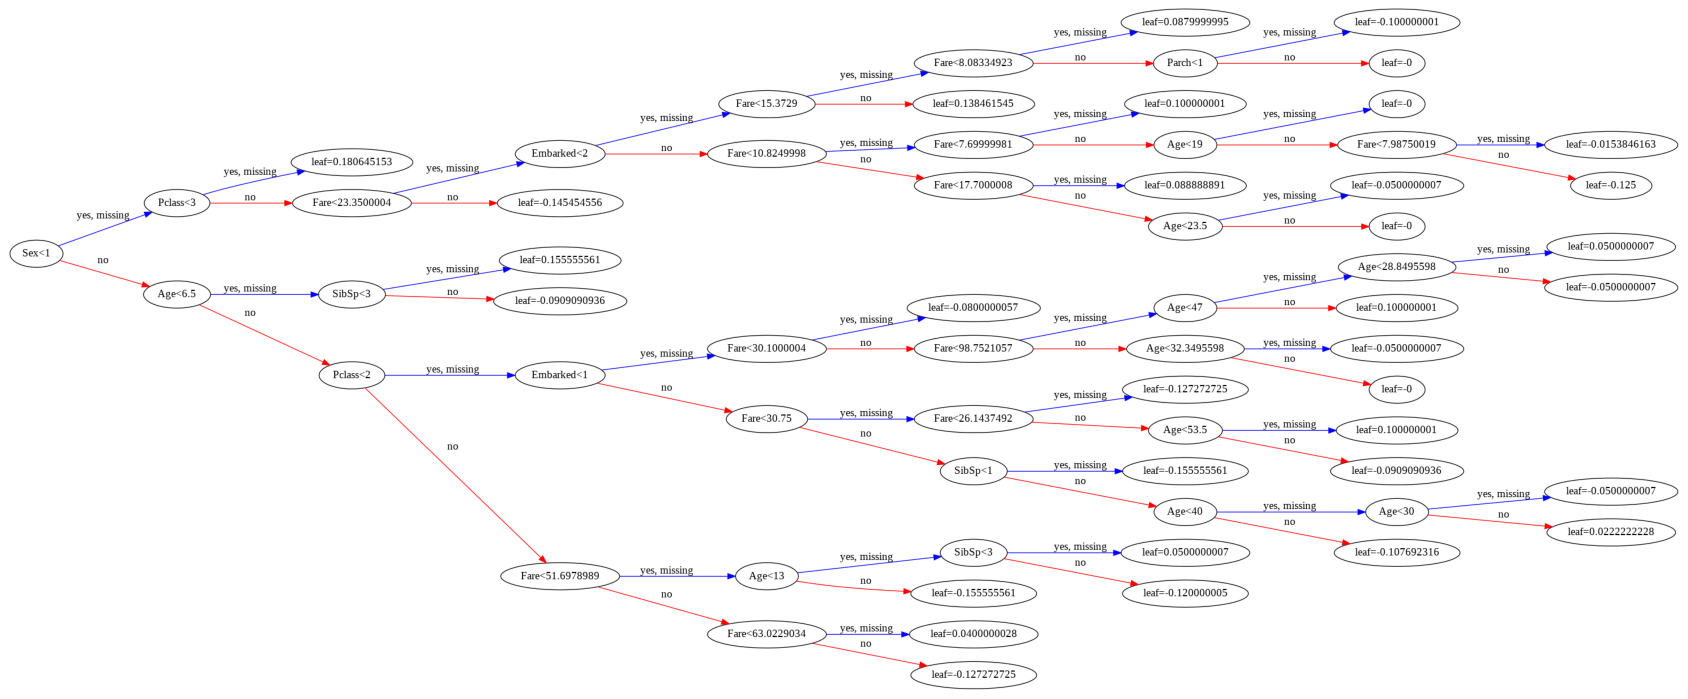

In [1010]:
# First descision tree
plot_tree(xgb, rankdir='LR',num_trees=0);

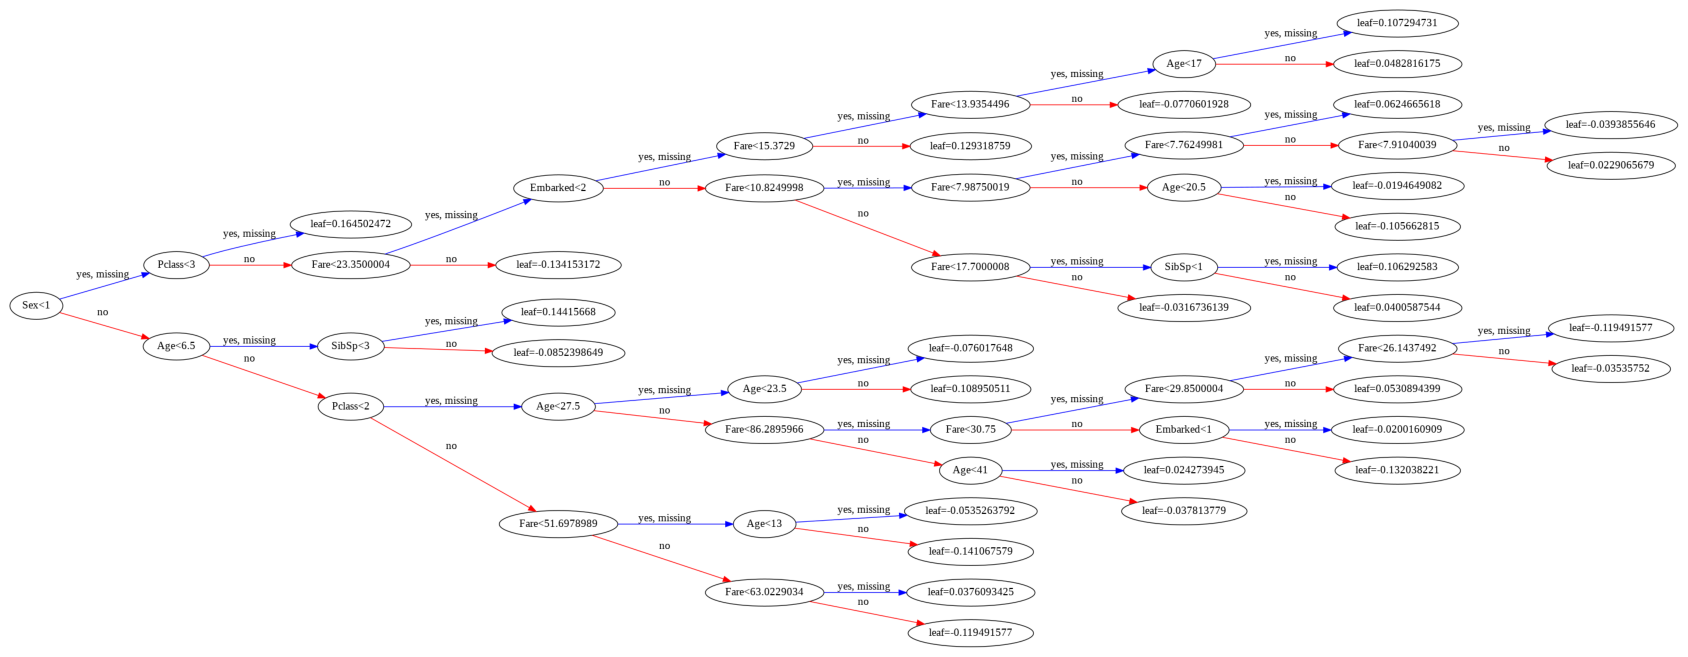

In [1011]:
# Second Descision Tree
plot_tree(xgb, rankdir='LR',num_trees=1);

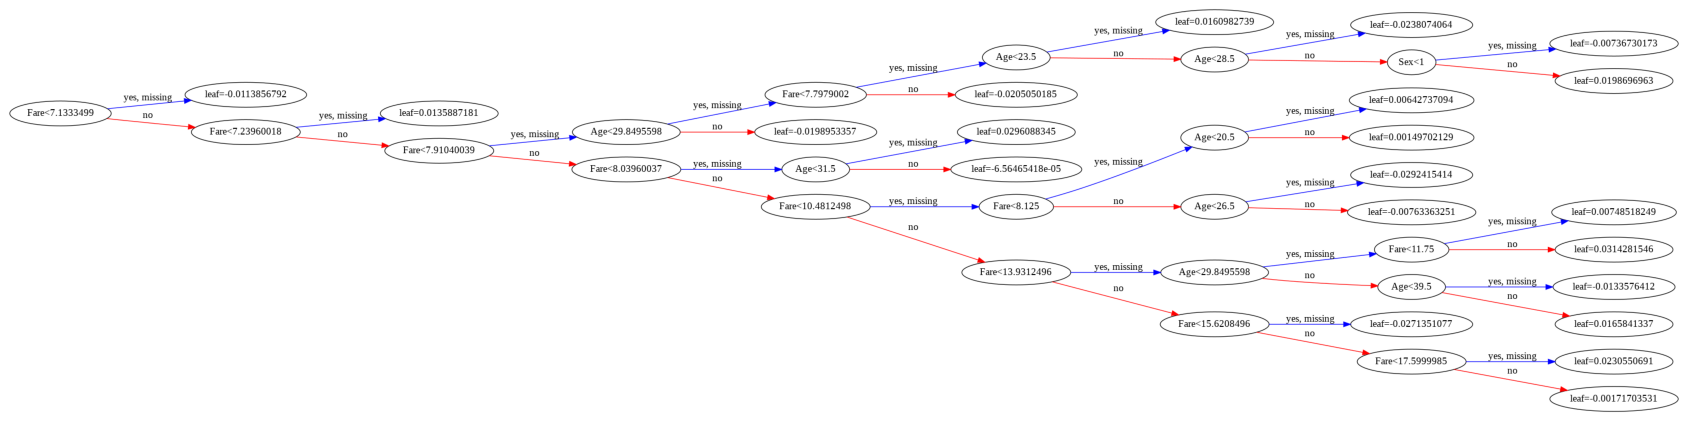

In [1012]:
# Last Descision Tree
plot_tree(xgb, rankdir='LR',num_trees=199);

Notice how the trees only compute residuals, and not the actual target value. We can also visualize the tree as text.

In [1013]:
tree = xgb.get_booster().get_dump()

In [1014]:
len(tree)

200

In [1015]:
# First Tree in texual formal
print(tree[0])

0:[Sex<1] yes=1,no=2,missing=1
	1:[Pclass<3] yes=3,no=4,missing=3
		3:leaf=0.180645153
		4:[Fare<23.3500004] yes=7,no=8,missing=7
			7:[Embarked<2] yes=13,no=14,missing=13
				13:[Fare<15.3729] yes=19,no=20,missing=19
					19:[Fare<8.08334923] yes=31,no=32,missing=31
						31:leaf=0.0879999995
						32:[Parch<1] yes=45,no=46,missing=45
							45:leaf=-0.100000001
							46:leaf=-0
					20:leaf=0.138461545
				14:[Fare<10.8249998] yes=21,no=22,missing=21
					21:[Fare<7.69999981] yes=33,no=34,missing=33
						33:leaf=0.100000001
						34:[Age<19] yes=47,no=48,missing=47
							47:leaf=-0
							48:[Fare<7.98750019] yes=59,no=60,missing=59
								59:leaf=-0.0153846163
								60:leaf=-0.125
					22:[Fare<17.7000008] yes=35,no=36,missing=35
						35:leaf=0.088888891
						36:[Age<23.5] yes=49,no=50,missing=49
							49:leaf=-0.0500000007
							50:leaf=-0
			8:leaf=-0.145454556
	2:[Age<6.5] yes=5,no=6,missing=5
		5:[SibSp<3] yes=9,no=10,missing=9
			9:leaf=0.155555561
			10:leaf=-0.09090

<b> Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input. </b>

In [1016]:
xgb.feature_importances_

array([0.23491788, 0.5572898 , 0.0382579 , 0.06605473, 0.03283117,
       0.0376297 , 0.03301882], dtype=float32)

In [1017]:
importances = {
    'Features':X_train.columns,
    'Weights':xgb.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

,Features,Weights
1,Sex,0.557290
0,Pclass,0.234918
3,SibSp,0.066055
2,Age,0.038258
5,Fare,0.037630
6,Embarked,0.033019
4,Parch,0.032831


In [1018]:
sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)

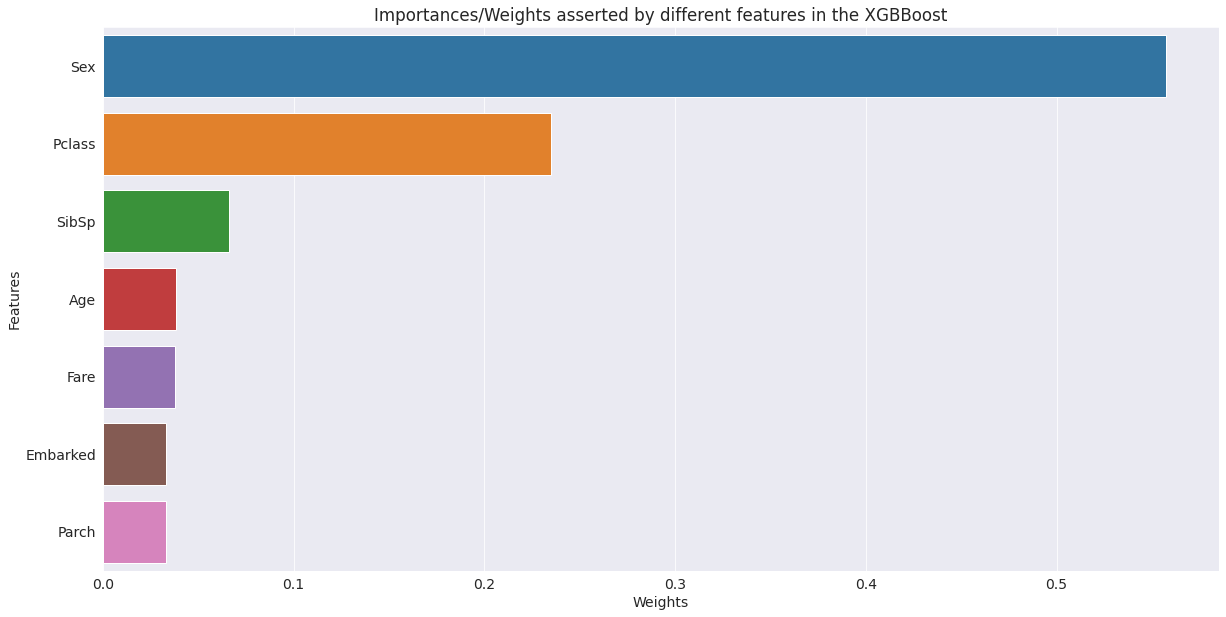

In [1019]:
plt.title("Importances/Weights asserted by different features in the XGBBoost")
sns.barplot(x = 'Weights', y ='Features', data = importances);

It looks like Sex feature is the most important feature.

#### Hyperparameter Tuning For the GBM Model

We will tune the following Hyeprparameters:

  1. max_depth

  2. max_leaf_nodes

  3. n_estimators

  4. booster

  5. min_child_weight

In [1020]:
# our original model
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 8, n_estimators = 200, max_leaf_nodes = 64)

<b> Tuning the Hyperparameter max_depth </b>

In [1021]:
max_depth_values = list(range(2,30,2))

training_error = []
validation_error = []

In [1022]:
for i in max_depth_values:
  xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = i, n_estimators = 200, max_leaf_nodes = 64).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,xgb.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,xgb.predict(X_val))))

In [1023]:
  errors_df = pd.DataFrame({
    'Max Depth':max_depth_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,Max Depth,Training Error,Validation Error
0,2,0.116766,0.174888
1,4,0.070359,0.197309
2,6,0.044910,0.206278
3,8,0.028443,0.215247
4,10,0.023952,0.219731
5,12,0.022455,0.219731
6,14,0.022455,0.219731
7,16,0.022455,0.219731
8,18,0.020958,0.215247
9,20,0.020958,0.219731


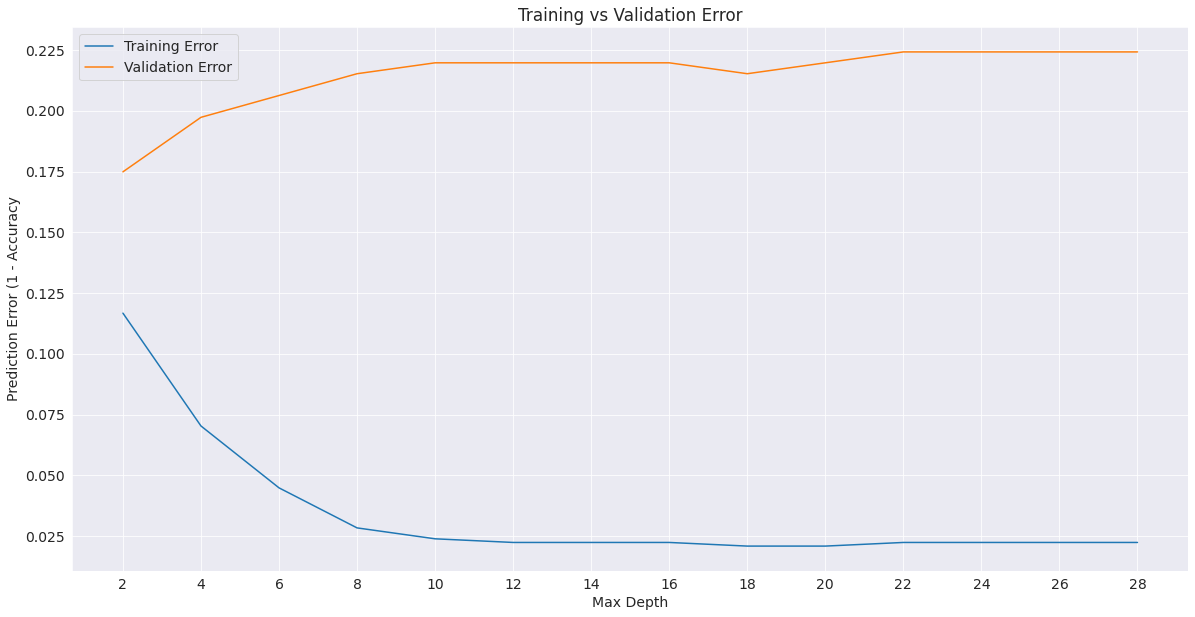

In [1024]:
# plotting in graph
plt.title('Training vs Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy')
plt.plot(errors_df['Max Depth'], errors_df["Training Error"])
plt.plot(errors_df['Max Depth'], errors_df["Validation Error"])
plt.xticks(max_depth_values)
plt.legend(['Training Error','Validation Error']);

While looking at the graph above, we can clearly see that our model starts overfitting on the training data right after max_depth = 4. Perhaps, its best if we tune our model by setting max_depth = 4, even though there is significant increase in validation loss when max_depth = 4. It's just that our model probably wouldn't work if max_depth is set to 2.

In [1025]:
# Tuned Model
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 200, max_leaf_nodes = 64).fit(X_train,y_train)

<b> Tuning the Hyperparameter max_leaf_nodes </b>

In [1026]:
max_leaf_nodes_values = [2 ** i for i in range(1,12)]

training_error = []
validation_error = []

In [1027]:
for i in max_leaf_nodes_values:
  xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 200, max_leaf_nodes = i).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,xgb.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,xgb.predict(X_val))))

In [1028]:
  errors_df = pd.DataFrame({
    'Max_leaf_nodes':max_leaf_nodes_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,Max_leaf_nodes,Training Error,Validation Error
0,2,0.070359,0.197309
1,4,0.070359,0.197309
2,8,0.070359,0.197309
3,16,0.070359,0.197309
4,32,0.070359,0.197309
5,64,0.070359,0.197309
6,128,0.070359,0.197309
7,256,0.070359,0.197309
8,512,0.070359,0.197309
9,1024,0.070359,0.197309


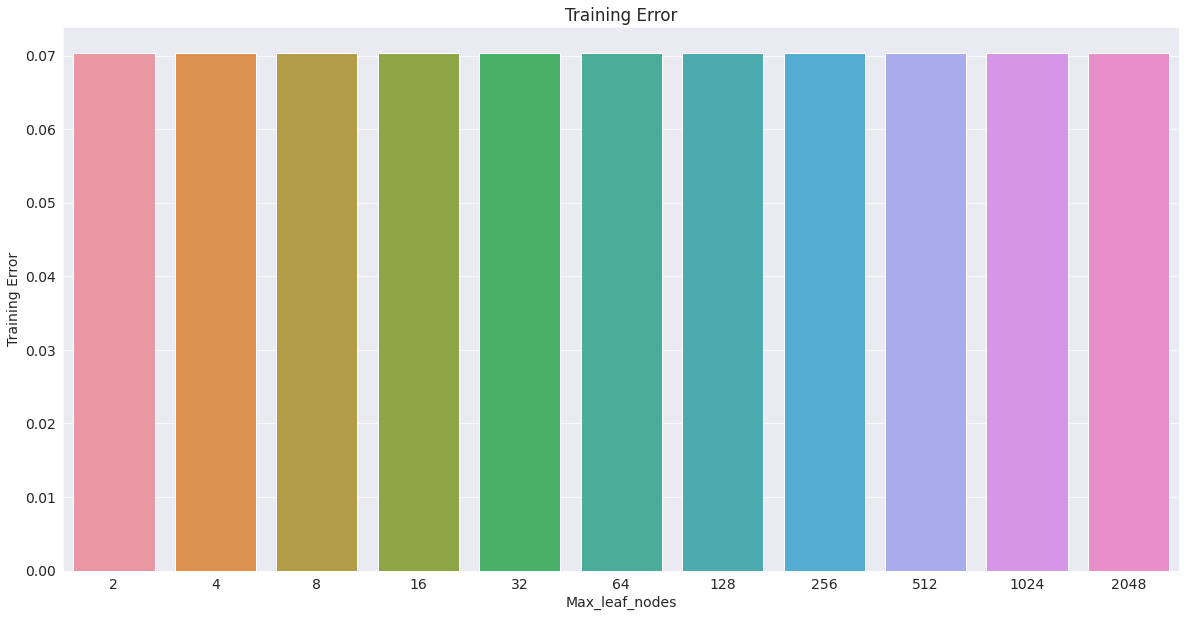

In [1029]:
# plotting in graph
plt.title('Training Error')
sns.barplot(x = 'Max_leaf_nodes', y = 'Training Error', data = errors_df);

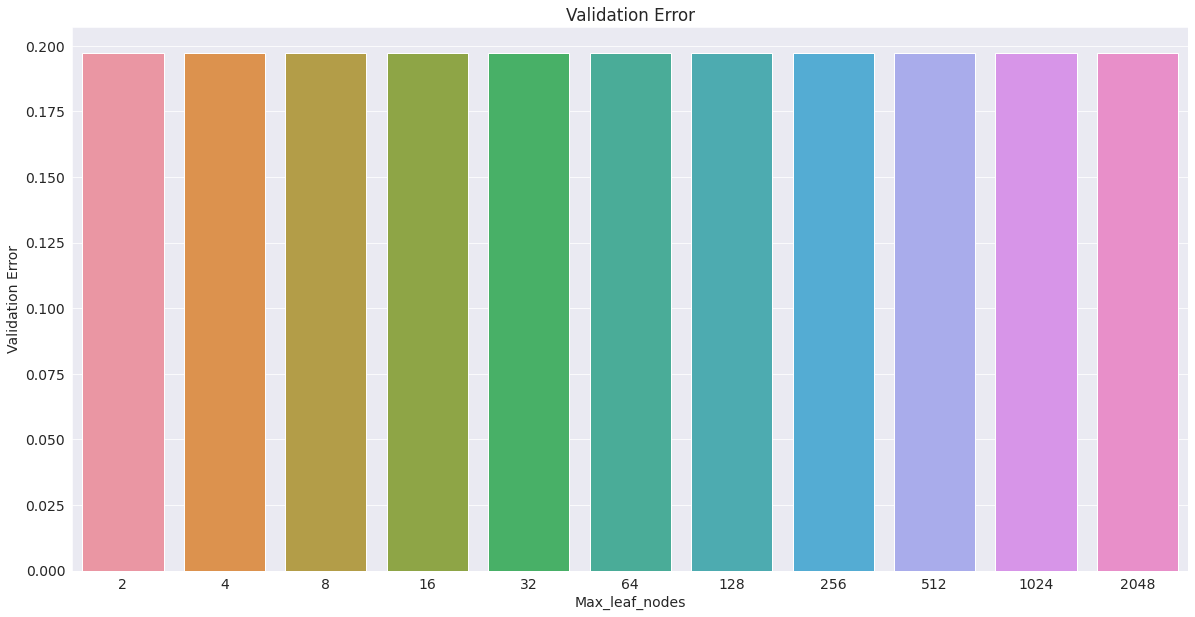

In [1030]:
# plotting in graph
plt.title('Validation Error')
sns.barplot(x = 'Max_leaf_nodes', y = 'Validation Error', data = errors_df);

It looks like our model is unaffected much by changing the value of hyperparameter max_leaf_nodes. Maybe lets set max_leaf_nodes = 128 to see if our model will perform any better than the random forest model.

<b> Tuning Hyperparameter n_estimators

In [1031]:
# Tuned Model
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 200, max_leaf_nodes = 128).fit(X_train,y_train)

In [1032]:
n_estimators_values = list(range(50,1050,50))

training_error = []
validation_error = []

In [1033]:
for j in n_estimators_values:
  xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = j, max_leaf_nodes = 128).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,xgb.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,xgb.predict(X_val))))

In [1034]:
errors_df = pd.DataFrame({
    'n_estimators':n_estimators_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,n_estimators,Training Error,Validation Error
0,50,0.110778,0.192825
1,100,0.098802,0.201794
2,150,0.080838,0.192825
3,200,0.070359,0.197309
4,250,0.064371,0.197309
5,300,0.056886,0.197309
6,350,0.052395,0.206278
7,400,0.046407,0.201794
8,450,0.043413,0.197309
9,500,0.040419,0.201794


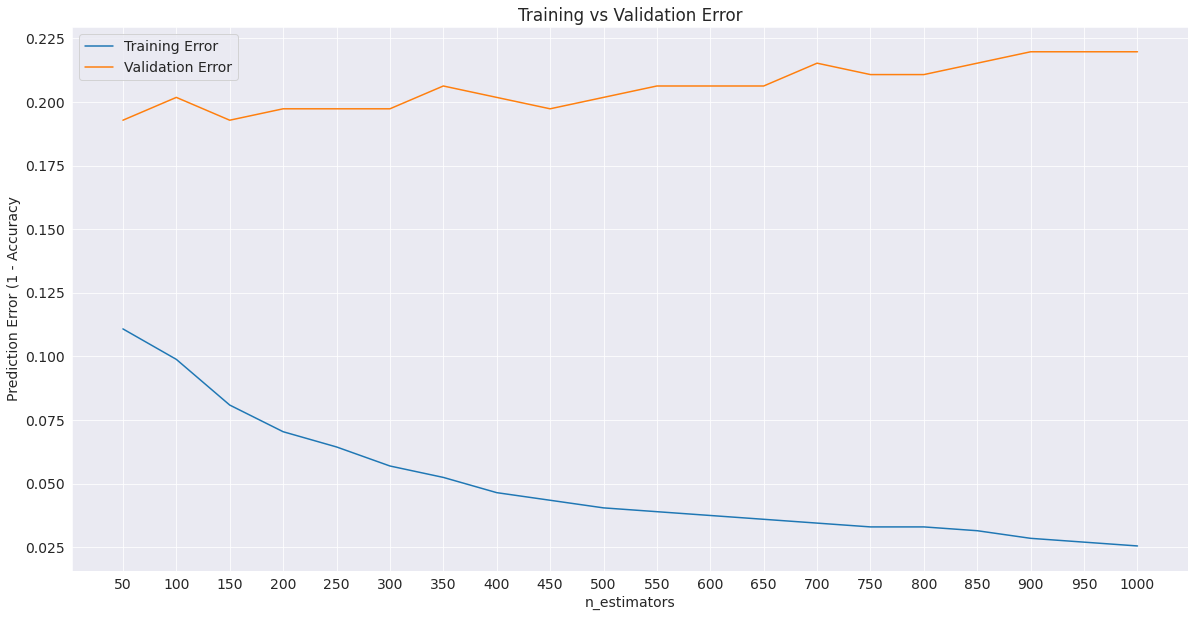

In [1035]:
# plotting in graph
plt.title('Training vs Validation Error')
plt.xlabel('n_estimators')
plt.ylabel('Prediction Error (1 - Accuracy')
plt.plot(errors_df['n_estimators'], errors_df["Training Error"])
plt.plot(errors_df['n_estimators'], errors_df["Validation Error"])
plt.xticks(n_estimators_values)
plt.legend(['Training Error','Validation Error']);

We can clearly see that our model has started overfitting on the training data after n_estimators = 150. Furthermore, our model also performs best when n_estimators = 150. Thus, we will tune our model that way.

In [1036]:
# tuned model
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 150, max_leaf_nodes = 128).fit(X_train,y_train)

<b> Tuning Hyperparameter Booster </b>

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

old model

In [1037]:
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 150, max_leaf_nodes = 128).fit(X_train,y_train)

In [1038]:
train1 = accuracy_score(y_train,xgb.predict(X_train))
val1 = accuracy_score(y_val, xgb.predict(X_val))

New Model

In [1039]:
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 150, max_leaf_nodes = 128, booster = 'gblinear').fit(X_train,y_train)

In [1040]:
train2 = accuracy_score(y_train,xgb.predict(X_train))
val2 = accuracy_score(y_val, xgb.predict(X_val))

In [1041]:
tuned_df = pd.DataFrame({
    'Models':['Old Training Accuracy', 'New Training Accuracy', 'Old Validation Accuracy', 'New Validation Accuracy'],
    'Values':[train1,train2,val1,val2],
    'Bool':['Old','New','Old','New']
})

tuned_df

,Models,Values,Bool
0,Old Training Accuracy,0.919162,Old
1,New Training Accuracy,0.682635,New
2,Old Validation Accuracy,0.807175,Old
3,New Validation Accuracy,0.686099,New


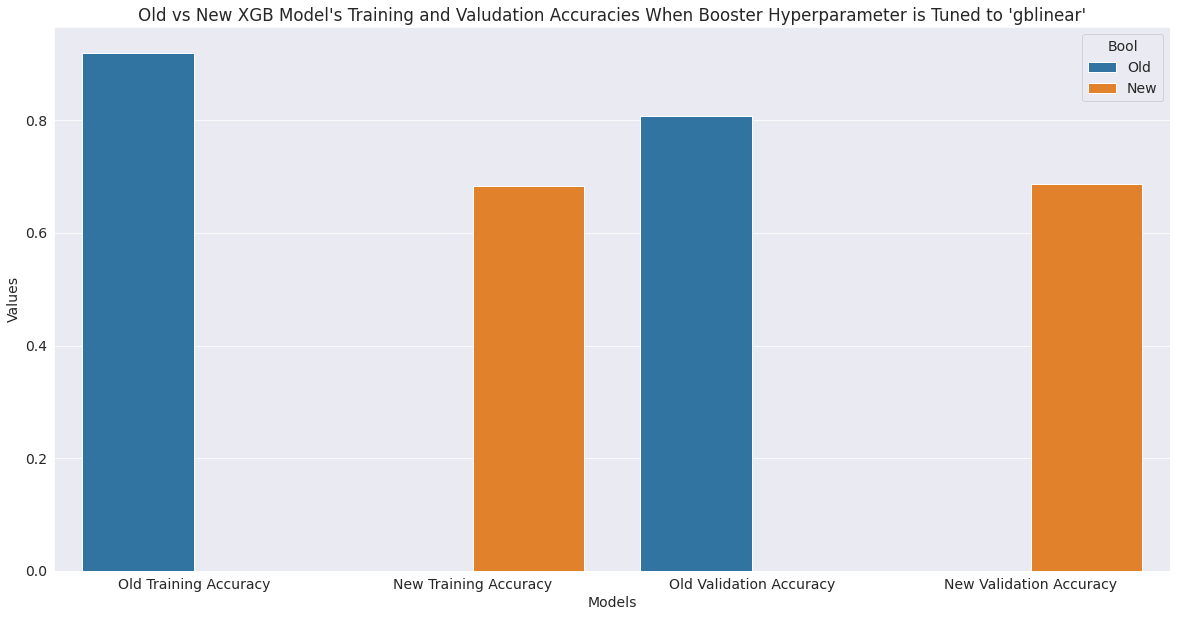

In [1042]:
plt.title('Old vs New XGB Model\'s Training and Valudation Accuracies When Booster Hyperparameter is Tuned to \'gblinear\'')
sns.barplot(x = 'Models', y = 'Values', hue = 'Bool', data = tuned_df);

Clearly, a linear model is not well suited for this dataset.

<b> Tuning Hyperparameter min_child_weight </b>

In [1043]:
# Tuned Model
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 150, max_leaf_nodes = 128).fit(X_train,y_train)

In [1044]:
max_child_weight_values = list(range(1,10))

training_error = []
validation_error = []

In [1045]:
for j in max_child_weight_values:
  xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 150, max_leaf_nodes = 128, max_child_weight = j).fit(X_train,y_train)
  training_error.append((1 - accuracy_score(y_train,xgb.predict(X_train))))
  validation_error.append((1 - accuracy_score(y_val,xgb.predict(X_val))))

In [1046]:
errors_df = pd.DataFrame({
    'max_child_weight_values':max_child_weight_values,
    'Training Error':training_error,
    'Validation Error':validation_error
})
errors_df

,max_child_weight_values,Training Error,Validation Error
0,1,0.080838,0.192825
1,2,0.080838,0.192825
2,3,0.080838,0.192825
3,4,0.080838,0.192825
4,5,0.080838,0.192825
5,6,0.080838,0.192825
6,7,0.080838,0.192825
7,8,0.080838,0.192825
8,9,0.080838,0.192825


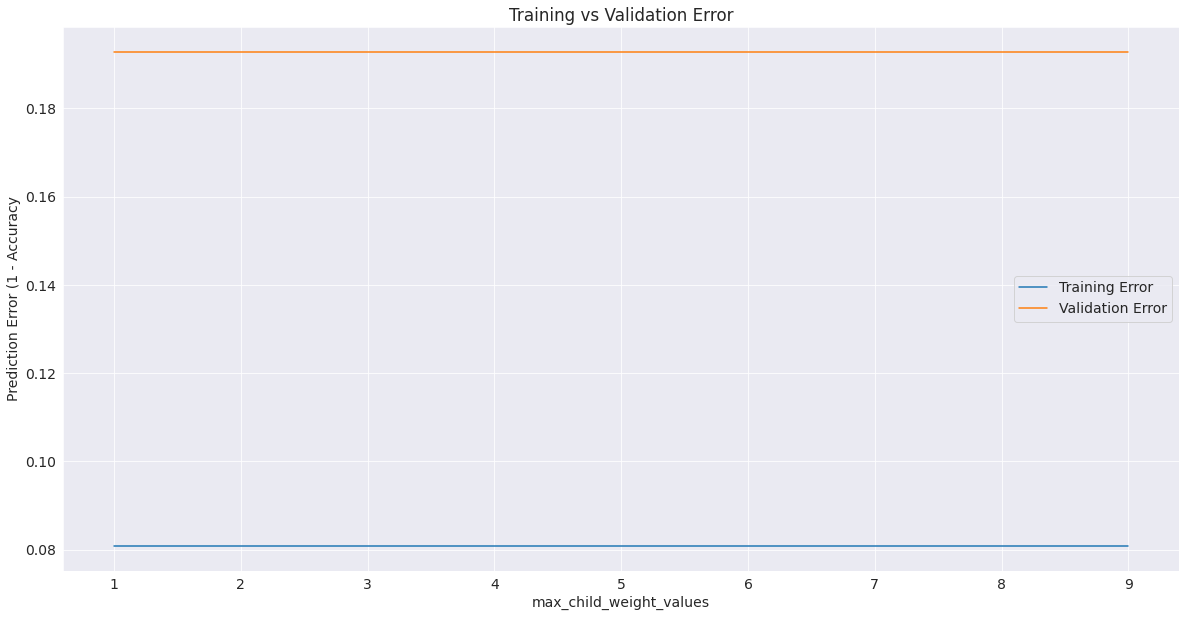

In [1047]:
# plotting in graph
plt.title('Training vs Validation Error')
plt.xlabel('max_child_weight_values')
plt.ylabel('Prediction Error (1 - Accuracy')
plt.plot(errors_df['max_child_weight_values'], errors_df["Training Error"])
plt.plot(errors_df['max_child_weight_values'], errors_df["Validation Error"])
plt.xticks(max_child_weight_values)
plt.legend(['Training Error','Validation Error']);

Well, it clearly looks like our XGB Model is unaffected by the change in Hyperparameter max_child_weight. So, we will select max_child_weight = 5 ,and tune our model that way.

In [1048]:
# Final Tuned Model
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 150, max_leaf_nodes = 128, max_child_weight = 5).fit(X_train,y_train)

#### Using K-Fold Cross Validation

In [1049]:
# Final Tuned Model
xgb = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 4, n_estimators = 150, max_leaf_nodes = 128, max_child_weight = 5).fit(X_train,y_train)

In [1050]:
cv_train = cross_val_score(xgb, X_train, y_train, cv = 20, scoring = 'accuracy')
cv_validation = cross_val_score(xgb, X_val, y_val, cv = 20, scoring = 'accuracy')

In [1051]:
print('Our mean cross validated accuracy on Training data = ',cv_train.mean())

Our mean cross validated accuracy on Training data =  0.8262477718360071


In [1052]:
print('Our mean cross validated accuracy on Validation data = ',cv_validation.mean())

Our mean cross validated accuracy on Validation data =  0.7761363636363636


#### Confusion Matrix for Random Forest Model

In [1055]:
cm = confusion_matrix(y_val, xgb.predict(X_val))
cm

array([[116,  18],
       [ 25,  64]])

In [1056]:
True_Positive = TP = cm[1,1]
True_Negative = TN = cm[0,0]
False_Positive = FP = cm[0,1]
False_Negative = FN = cm[1,0]

In [1057]:
True_Positive,True_Negative,False_Positive,False_Negative

(64, 116, 18, 25)

<b> Classification Error </b>

How often is the classifier incorrect?

In [1058]:
print((FP+FN)/ float(TP+TN+FP+FN))
print(1 - (accuracy_score(y_val, xgb.predict(X_val))))

0.19282511210762332
0.19282511210762332


<b> Sensitivity </b>

When the actual value is positive(1), how often is prediction correct ?

In [1059]:
from sklearn import metrics

print(TP /float(TP+FN))
print(metrics.recall_score(y_val,xgb.predict(X_val), pos_label=1))

0.7191011235955056
0.7191011235955056


<b> Specificity </b>

When the actual value is negative, how often is the prediction correct ?

In [1060]:
print(TN/float(TN + FP))

0.8656716417910447


<b> False Positive Rate </b>

When actual value is negative, how often is the prediction negative ?

In [1061]:
print(FP/float(TN+FP)) # note: False positive rate = (1 - specificity)

0.13432835820895522


<b> Prediction</b>

When a positive value is predicted, how often is prediction correct ?

In [1062]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_val,xgb.predict(X_val),pos_label=1))

0.7804878048780488
0.7804878048780488


#### Making Predictions on Testing set and Saving the Predictions for Submission on Kaggle

In [1063]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [1064]:
test_predictions = xgb.predict(test_df)

In [1066]:
# lets create a csv file and save our prediction for this XGBClassifier model to be uploaded in kaggle
solution_df = submission_df.copy()
solution_df.Survived = test_predictions

In [1067]:
# saving out predictions to a new file called 'submission_XGBClassifier.csv'
solution_df.to_csv('submission_XGBClassifier.csv', index = False)

#### Conclusion

This model had only about 76 % accuracy as measured by kaggle, which is not great as compared to our Random Forest Model which had accuracy of about 78 % on the testing data.

##  Testing Accuracies For All Used Models

We tested our data on the following models:


  1. KNN

  2. Logistic Regression

  3. Descision Tree

  4. Random Forest

  5. Support Vector Machines

  6. Naive Bayes

  7. Gradient Boosting Machines

  Among these models, `Random Forest` is the winner as it had the highest testing accuracy, as measured by kaggle: 78.6 %. 

## <b> Thank You 
 -- Done by Sujan Neupane